### This notebook does the following
* Read in (or initiate) phase info
* Read in and process pressure field
* Compare pressure input to net energy growth
* Plot pressure contour
* Find phase different

In [99]:
import numpy as np
from tqdm import tqdm
import os
from prepare import load_object, save_object
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from matplotlib import ticker
from matplotlib.legend_handler import HandlerTuple
from matplotlib.ticker import FuncFormatter, MultipleLocator

#### Setting colormap
https://www.py4u.net/discuss/222050

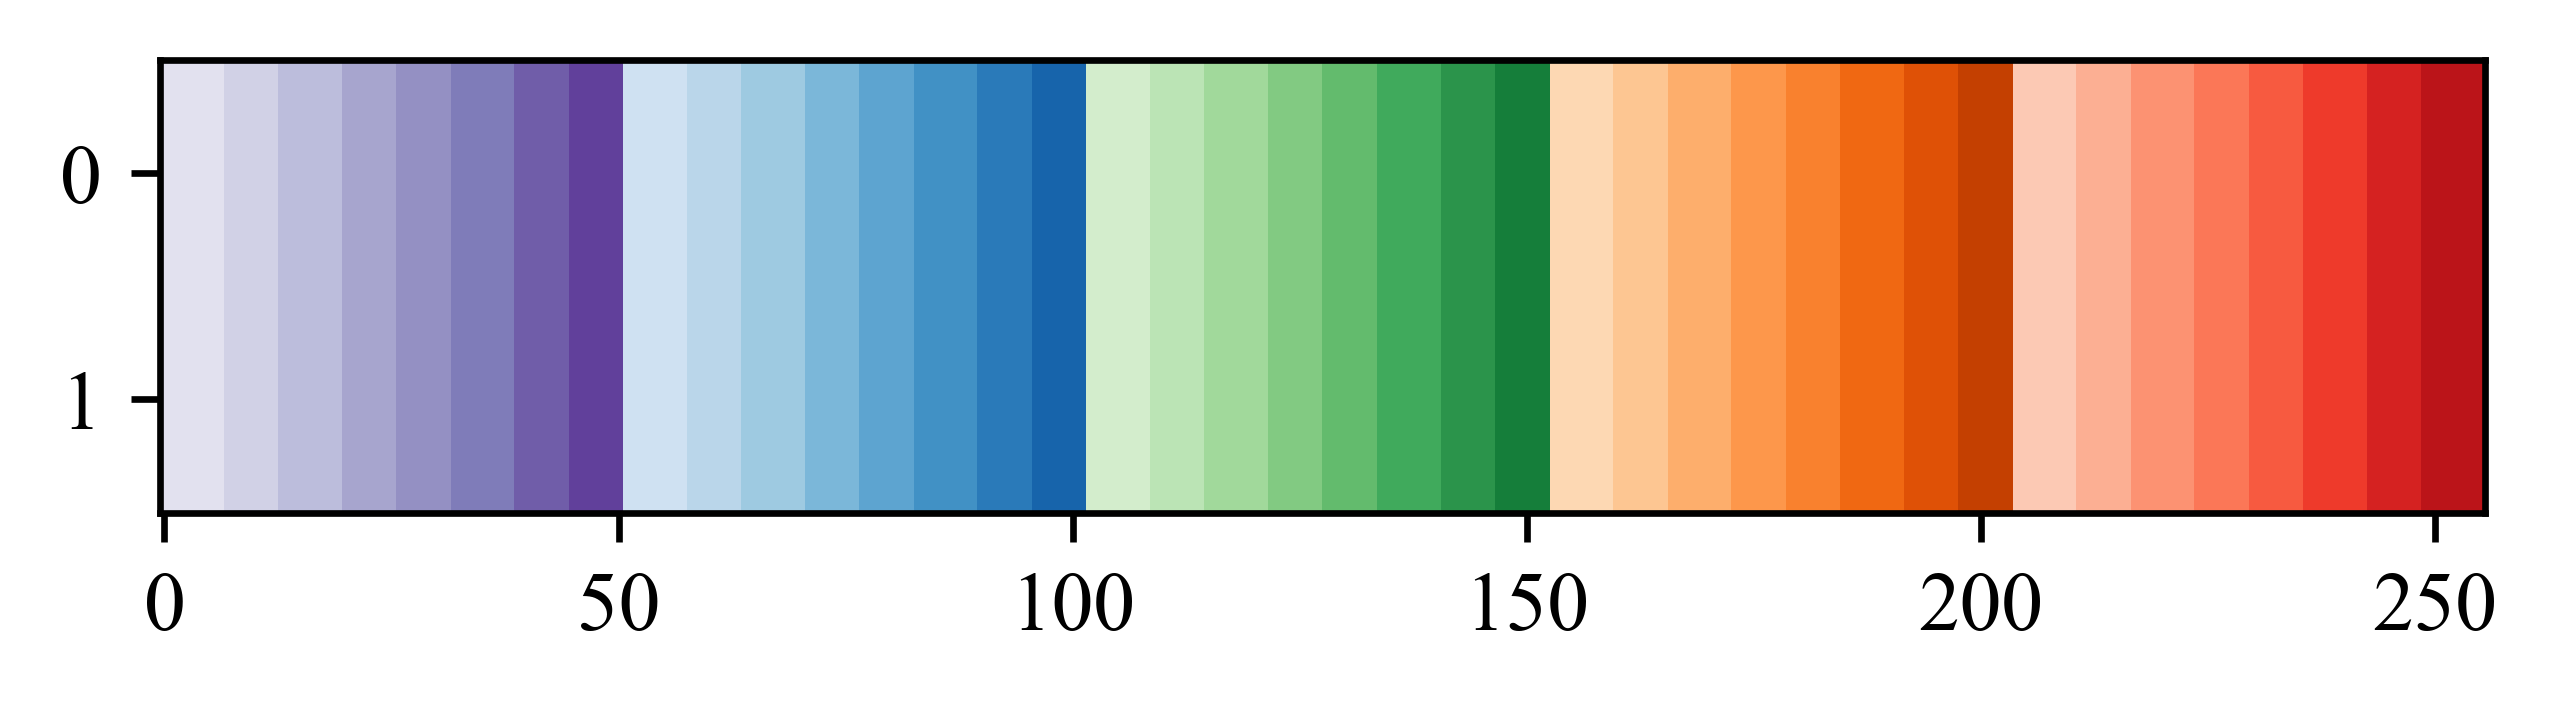

In [94]:
N = 8 # number of colors to extract from each of the base_cmaps below
base_cmaps = ['Purples','Blues','Greens','Oranges','Reds',]

n_base = len(base_cmaps)
# we go from 0.2 to 0.8 below to avoid having several whites and blacks in the resulting cmaps
colors = np.concatenate([plt.get_cmap(name)(np.linspace(0.2,0.8,N)) for name in base_cmaps])
cmap = mpl.colors.ListedColormap(colors) 

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(1,1,figsize=(5,1))
ax.imshow(gradient, aspect='auto', cmap=cmap)

In [4]:
# ak = 0.05
(case13.cc,case14.cc) = cmap((6,3))
(case13.marker,case14.marker) = ('s','s')
# ak = 0.1
(case4.cc, case5.cc, case6.cc) = cmap((13,11,9))
(case4.marker, case5.marker, case6.marker) = ('^','^','^')
# ak = 0.15
(case7.cc, case8.cc, case9.cc, case10.cc, case11.cc, case12.cc) = cmap((23,22,21,20,19,18))
(case7.marker, case8.marker, case9.marker, case10.marker, case11.marker, case12.marker) = ('x','x','x','x','x','x')
# ak = 0.2
(case1.cc, case2.cc, case3.cc) = cmap((29,27,25))
(case1.marker, case2.marker, case3.marker) = ('o','o','o')

0.005914270409657273
0.0013662264006102495
-7.989215339888949e-06


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


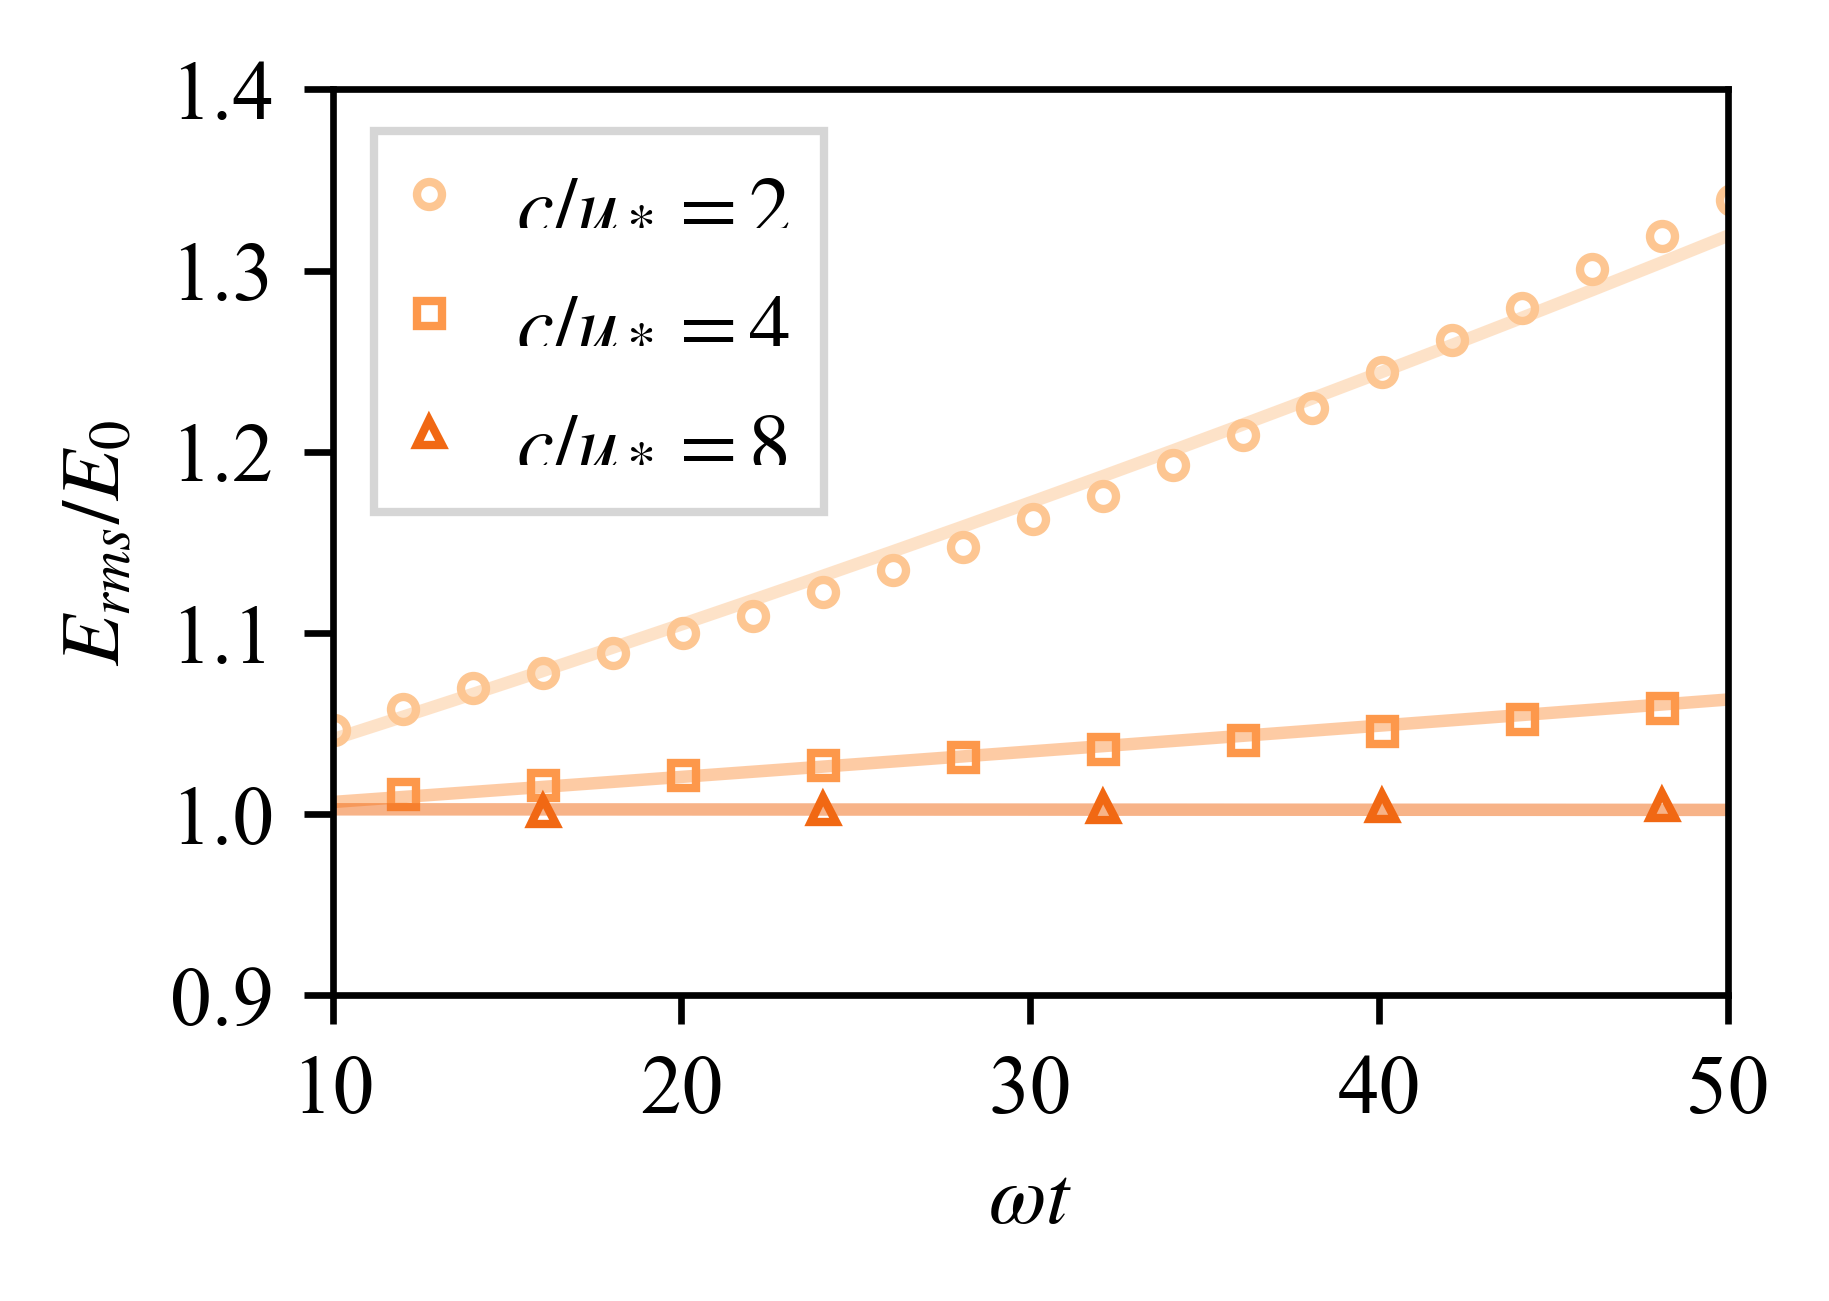

In [92]:
""" FIGURE: Wave growth plot, after all the E_rms have been computed. """
fig = plt.figure(figsize=[3,2]); ax = plt.gca()

def plotE(case, skip=1):
    plt.plot(np.array(case.phase['t'][0:-1:skip])*case.wave.omega, case.E_rms[0:-1:skip]/case.E_rms[0], marker=case.marker, mfc='none',
             label=r'$c/u_*=%.0f$' %(case.wave.c/case.ustar), lw=0, markersize=3, color=case.cc, alpha = 1) 
#     plt.plot(np.array(case.phase['t'])*case.wave.omega, case.Ep/case.Ep[0], color=case.cc, marker = case.marker, mfc='none',
#              markeredgewidth=1, lw=0, markersize=3)

""" Fit an exponential """
def fit_exponential(case):
    case.wa, wb = np.polyfit(np.array(case.phase['t'])[0:25]*case.wave.omega, np.log(case.E_rms/case.E_rms[0])[0:25], 1)
    plt.plot(np.array(case.phase['t'])*case.wave.omega, np.exp(case.wa*np.array(case.phase['t'])*case.wave.omega+wb), color=case.cc, alpha = 0.5)
    print(case.wa)

# for case in (case1,case2,case3,case7,case8,case9,case10,case11,case12,case4,case5,case6):
#     if case == case7 or case==case8 or case==case9 or case==case10 or case==case12:
#         plotE(case,skip=10)
#     else:
#         plotE(case,skip=1)
#     fit_exponential(case)

# Only plot one slope
(case1.marker, case2.marker, case3.marker) = ('o','s','^')
for case in (case1,case2,case3):
    plotE(case)
    fit_exponential(case)

# for case in (case1,case2,case4,case5,case13,case14):
#     plotE(case)
#     fit_exponential(case)


# ax.text(0.4, 0.9, r'$\bar{\beta} = %.3f$' % case1.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(4), transform=ax.transAxes)
# ax.text(0.87, 0.48, r'$\bar{\beta} = %.3f$' % case2.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(5), transform=ax.transAxes)
plt.xlabel(r'$\omega t$'); plt.ylabel(r'$E_{rms}/E_0$')
plt.ylim([0.9,1.4]); plt.xlim([10,50])
plt.legend(loc='upper left', fancybox=False, handlelength=0.5)
fig.savefig('figures_jfm/wave_growth.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/wave_growth.eps', bbox_inches='tight', pad_inches=0.1)

In [ ]:
""" Wave growth plot alternative """

fig = plt.figure(figsize=[4,2]); ax = plt.gca()

def plotE(case, markercolor=plt.get_cmap('tab20c')(4)):
    T = 2*np.pi/case.wave.omega     
    plt.plot(np.array(case.phase['t']), case.E_rms_raw-case.E_rms_raw[0], marker=case.marker, mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=case.cc, alpha = 1) 
#     plt.plot(np.array(case.phase['t'])/T, case.Ep/case.Ep[0], color=case.cc, marker = case.marker, mfc='none',
#              markeredgewidth=1, lw=0, markersize=3)

""" Fit an exponential """
def fit_exponential(case):
    T = 2*np.pi/case.wave.omega
    case.wa, wb = np.polyfit(np.array(case.phase['t'])/T, np.log(case.E_rms/case.E_rms[0]), 1)
#     plt.plot(np.array(case.phase['t'])/T, np.exp(case.wa*case.t/T+wb), color=linecolor, alpha = 0.5)
    plt.plot(np.array(case.phase['t']), np.exp(case.wa*np.array(case.phase['t'])/T+wb), color=case.cc, alpha = 0.5)
    print(case.wa)

for case in (case1,case2,case3,case7,case8,case9,case10,case11,case4,case5,case6):
    plotE(case)
# for case in (case2,case8,case5):
#     plotE(case)
# for case in (case1,case7,case4):
#     plotE(case)


# ax.text(0.4, 0.9, r'$\bar{\beta} = %.3f$' % case1.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(4), transform=ax.transAxes)
# ax.text(0.87, 0.48, r'$\bar{\beta} = %.3f$' % case2.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(5), transform=ax.transAxes)
plt.xlabel(r'$t$'); plt.ylabel(r'$E-E_0$'); plt.xlim([-1,52])
plt.ylim([-0.0002,0.0015])
# plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')

### Compare growth rate computed from two different ways

In [42]:
""" PROCESSING: Process the bulk pressure field case.p_2D (time series) and compute the enery input. 
    Dependency: array_newcoord function. Need case.p_2D arrays.
    Add Fp to the case. """
from coordinate import array_newcoord
from scipy.signal import savgol_filter

def processing_energy1 (case):
    case.Fp = np.zeros(len(case.p_2D))
    for i in tqdm(range(0, len(case.p_2D))):
        f_2D = case.f_2D[-1]
#         f_2D = f_2D[i] # We don't have as big a smapling frequency for f_2D
        """ Subtract the mean """
        case.p_2D[i] = case.p_2D[i]*(1-f_2D)**10 # Air velocity
        paverage = np.average(case.p_2D[i][:,90:512])
        case.p_2D[i] = (case.p_2D[i] - paverage)*(1-f_2D)**10
        """ Interpolate onto new coordinate """
        eta = np.roll(np.average(case.phase['eta'][i], axis=0), -case.phase['idx'][i], axis=0) - 1
        p_2D_interp, zgrid = array_newcoord(case.p_2D[i], case=case, eta=eta)
        """ Smooth eta and compute the gradient """
        etahat = savgol_filter(eta, 31, 4) # window size 51, polynomial order 3
        grad = np.gradient(etahat)/(2*np.pi/512)    
        """ Compute the energy input """
        p = p_2D_interp[:,85]
        case.Fp[i] = np.average(p*grad)

for case in (case1,case2,case3,case4,case5,case6,case7,case8,case9,case10,case11,case12):
    processing_energy1(case)
# processing_energy1(case_con1)
# processing_energy1(case13)
# processing_energy1(case14)
# processing_energy1(case_pre1)

100%|██████████| 30/30 [00:22<00:00,  1.32it/s]


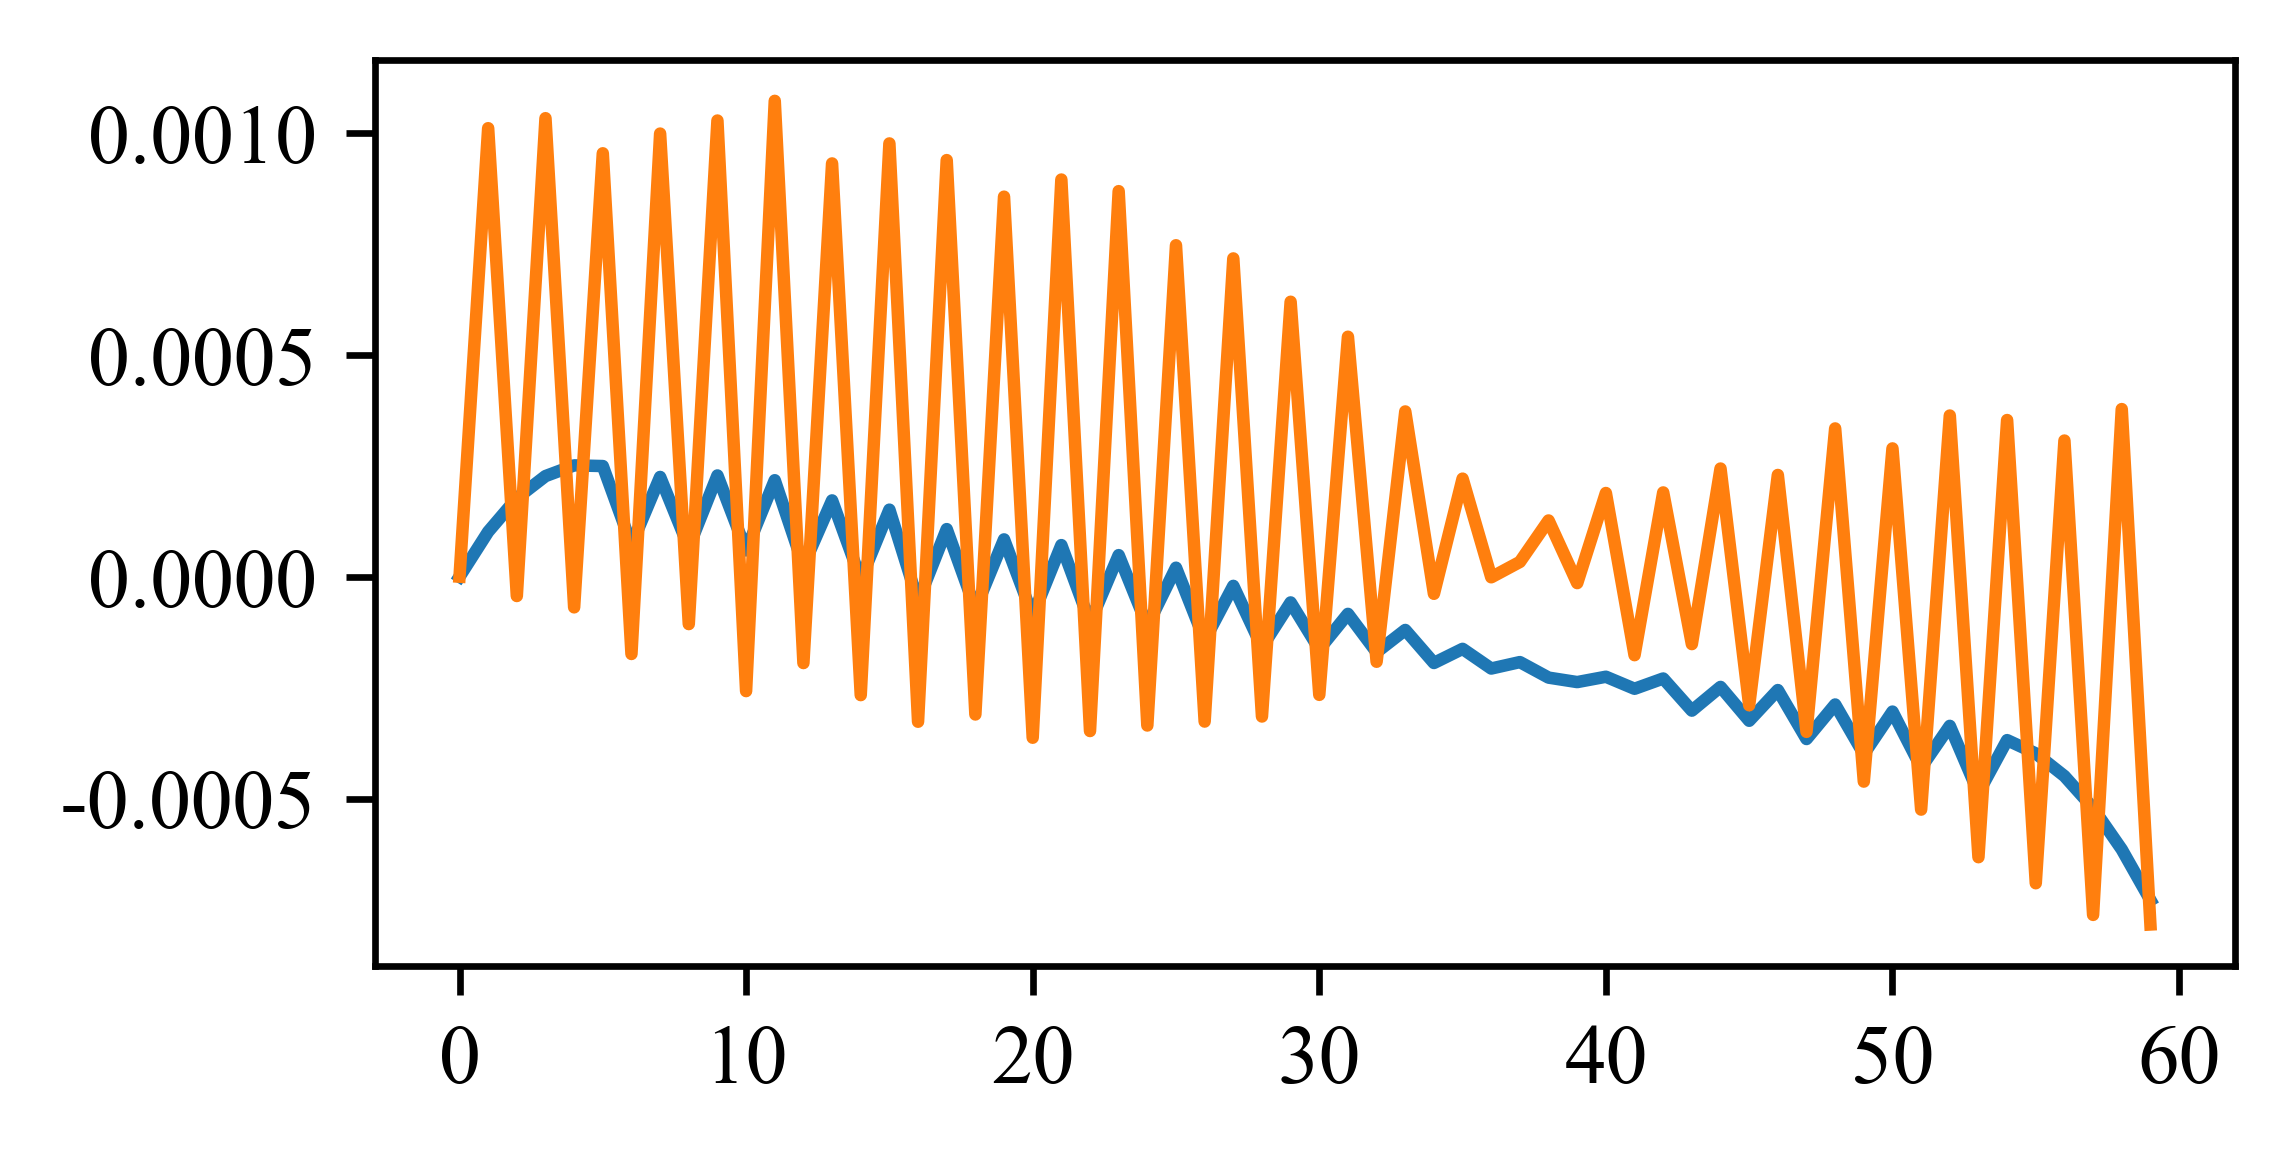

In [43]:
""" PROCESSING: compute energy growth rate. """
def processing_energy2 (case):
    case.E_rms_raw = [np.std(eta)**2 for eta in case.phase['eta']]
    case.E_rms_raw = np.array(case.E_rms_raw)*case.g*case.rho1
    case.E_rms= savgol_filter(case.E_rms_raw, 11, 2) # Filter?
    case.E_rate = np.zeros(len(case.E_rms))
    ntime = np.size(case.phase['t'])
#     for i in range(2, ntime-2):
#         case.E_rate[i] = (case.E_rms[i+2] - case.E_rms[i-2])/(case.phase['t'][i+2]-case.phase['t'][i-2])
#     case.E_rate[0] = (case.E_rms[1] - case.E_rms[0])/(case.phase['t'][1] - case.phase['t'][0])
#     case.E_rate[1] = (case.E_rms[2] - case.E_rms[0])/(case.phase['t'][2] - case.phase['t'][0])
#     case.E_rate[ntime-1] = (case.E_rms[ntime-1] - case.E_rms[ntime-2])/(case.phase['t'][ntime-1] - case.phase['t'][ntime-2])
#     case.E_rate[ntime-2] = (case.E_rms[ntime-1] - case.E_rms[ntime-3])/(case.phase['t'][ntime-1] - case.phase['t'][ntime-3])
    case.E_rate = np.gradient(case.E_rms)/(case.phase['t'][1]-case.phase['t'][0])
    case.E_rate_raw = np.gradient(case.E_rms_raw)/(case.phase['t'][1]-case.phase['t'][0])

for case in (case1,case2,case3,case4,case5,case6,case7,case8,case9,case10,case11,case12):
    processing_energy2(case)

processing_energy2(case_con1)
processing_energy2(case13)
processing_energy2(case14)

# """ CHECK: Check the filtered energy looks ok with the choice of filter parameters. """
fig = plt.figure(figsize=[4,2])
plt.plot(case.E_rms-case.E_rms[0])
plt.plot(case.E_rms_raw-case.E_rms_raw[0])

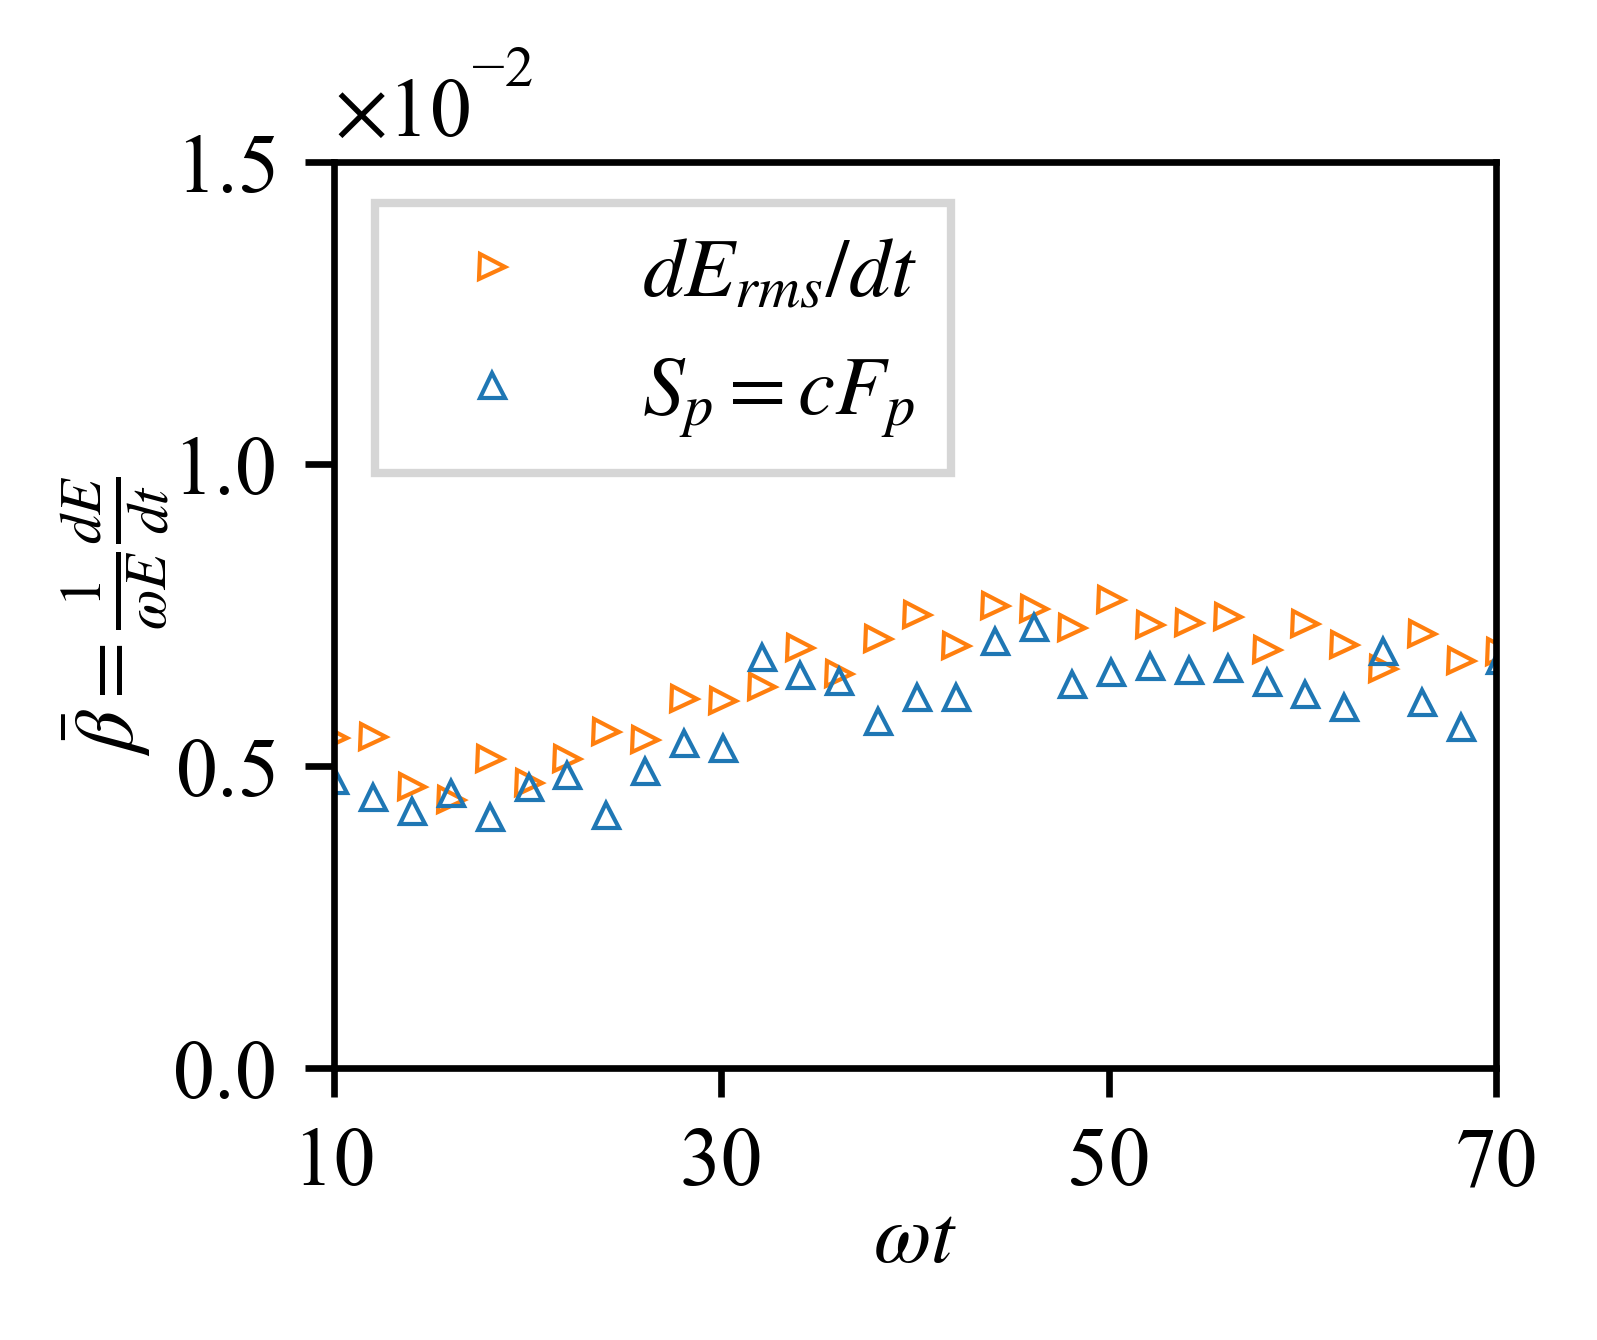

In [88]:
""" FIGURE: energy growth rate and pressure input. """
fig = plt.figure(figsize=[2.5,2]); ax = plt.gca()

case = case1
""" Normalized with E """
# plt.plot(np.array(case.phase['t'])*case.wave.omega/2/np.pi, case.E_rate/case.E_rms/case.wave.omega, label = r'$dE_{rms}/dt$')
# plt.plot(np.array(case.phase['t'])*case.wave.omega/2/np.pi, case.Fp*case.wave.c/case.E_rms/case.wave.omega, label = r'$cF_p$')
# plt.xlabel(r'$t/T$')
# plt.ylabel(r'$\frac{1}{\omega E}\frac{dE}{dt}$')

""" Normalized with E0 """
# case.E_rate_smooth = savgol_filter(case.E_rate, 21, 6) # Filter
# plt.plot(np.array(case.phase['t'])*case.wave.omega, case.E_rate_smooth/case.E_rms[0]/case.wave.omega, label = r'$dE_{rms}/dt$', marker='^', mfc='none',
#          markersize=3, alpha = 1) # Plot marker and line
# case.Fp_smooth = savgol_filter(case.Fp, 21, 6) # Filter
# plt.plot(np.array(case.p['t'])*case.wave.omega, case.Fp_smooth*case.wave.c/case.E_rms[0]/case.wave.omega, label = r'$cF_p$', marker='>', mfc='none',
#          markersize=3, alpha=1) # Plot marker and line
# plt.legend(loc = 'upper left')

""" Version 2 """
p1, = plt.plot(np.array(case.phase['t'])*case.wave.omega, case.E_rate/case.E_rms/case.wave.omega, c='C1', marker='>', mfc='none',
               markeredgewidth=0.5, lw=0, markersize=3) # First plot markers opaque
case.E_rate_smooth = savgol_filter(case.E_rate, 21, 6) # Then filter
# p2, = plt.plot(np.array(case.phase['t'])*case.wave.omega, case.E_rate_smooth/case.E_rms/case.wave.omega, label = r'$dE_{rms}/dt$', c='C0') # Then plot solid line
p3, = plt.plot(np.array(case.p['t'])*case.wave.omega, case.Fp*case.wave.c/case.E_rms/case.wave.omega, c='C0', marker='^', mfc='none',
               markeredgewidth=0.5, lw=0, markersize=3) # Plot markers 
case.Fp_smooth = savgol_filter(case.Fp, 21, 7) # Filter
# p4, = plt.plot(np.array(case.p['t'])*case.wave.omega, case.Fp_smooth*case.wave.c/case.E_rms/case.wave.omega, label = r'$cF_p$', c='C1') # Plot line
l = ax.legend([(p1), (p3)], [r'$dE_{rms}/dt$', r'$S_p = cF_p$'],
               handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper left', fancybox=False)

plt.xlabel(r'$\omega t$', labelpad=0)
plt.ylabel(r'$\bar{\beta} = \frac{1}{\omega E}\frac{dE}{dt}$', labelpad=0)
plt.ylim([-0.000,0.015])
plt.xlim([10, 70])

# plt.title(r'$ak=%g, c/u_*=%.0f$' %(case.ak, case.wave.c/case.ustar))
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
plt.yticks(np.arange(0, 0.02, 0.005))
plt.xticks(np.arange(10, 80, 20))
ax.yaxis.set_major_formatter(formatter) 


plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

fig.savefig('figures_jfm/cFp_vs_dEdt_ak02_c2.pdf', bbox_inches='tight', pad_inches=0.1)
# fig.savefig('figures/cFp_vs_dEdt_ak02_c2_version1.pdf', bbox_inches='tight', pad_inches=0.1)

### Finding $\phi_p$ and $\hat{p}$ and compare the drag computed to the full expression

In [46]:
""" PROCESSING: find phase shift and amplitude (assuming sinusoidal). """
from scipy.signal import argrelextrema

def find_dphase (p2D, eta, case):
    """ Args:
            p2D: one 2D pressure array 
            eta: because the array_newcoord needs some metadata
            case: because we need some metadata
        Returns:
            dphase: 4*1 array (for 4 peaks)
            amp: 4*1 array
    """               
    """ Coordinate transform the average p """
    p2D_interp, zgrid = array_newcoord(p2D, case=case, eta=eta)
    """ Find local maximum. Filter out the secondary peaks by requiring a positive p. """    
    p2D_hat = savgol_filter(p2D_interp[:,85], 81, 4)
    a_prime = np.array(argrelextrema(p2D_hat, np.greater)[0])
    a = []
    for idx in a_prime:
        if p2D_hat[idx] > 0:
            a.append(idx)
    a = np.array(a)
    b = np.array([128,256,384,512]) # Assuming already know where the eta peaks are
    if len(a) == len(b):
        dphase = b - a
        print(dphase)
    else: 
        print('Did not find 4 peaks!')
        print(a)
    """ But still uses the closest layer peaks for amplitude """
#     pamp = p2D_hat[a] 
    """ Define as (high - low)/2 instead """
    pamp = 0.5*(p2D_hat[a] - p2D_hat.min())
    pamp = np.array(pamp)
    return (dphase, pamp)

# for case in (case1,case2,case3,case7,case8,case4,case5,case6):
#     print(case.ak, case.wave.c/case.ustar)
#     p2D_aver = np.average(case.p_2D, axis=0)
#     eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
#     find_dphase(case)
#     print(case.pamp/case.tau0)
for case in (case1,case2,case3,case7,case8,case4,case5,case6,case7,case8,case9,case10,case11,case12,case13,case14):
    case.tau0 = case.rho2*case.ustar**2
    print('ak=%g, c/u_*=%.0f' %(case.ak, case.wave.c/case.ustar))
    p2D_aver = np.average(case.p_2D, axis=0)
    eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
    case.dphase, case.pamp = find_dphase(p2D_aver, eta, case)
    print(case.pamp/case.tau0)

ak=0.2, c/u_*=2
[28 28 28 26]
[5.17942874 5.01807727 5.20556674 5.15744992]
ak=0.2, c/u_*=4
[19 19 18 19]
[5.72072578 5.66589123 5.7794274  5.8700035 ]
ak=0.2, c/u_*=8
[31 30 27 33]
[3.5380719  3.96449136 4.22315675 3.59992066]
ak=0.15, c/u_*=2
[31 31 31 30]
[4.09602947 4.00934173 4.20348958 4.03148225]
ak=0.15, c/u_*=3
[26 26 27 24]
[4.74487031 4.74281934 4.68745544 4.69654668]
ak=0.1, c/u_*=2
[29 30 30 30]
[1.67013993 1.80169069 1.87102408 1.84280587]
ak=0.1, c/u_*=4
[17 17 16 17]
[3.61889413 3.57802902 3.57475327 3.70242756]
ak=0.1, c/u_*=8
[33 34 32 34]
[2.44476037 2.49868212 2.40344337 2.30806272]
ak=0.15, c/u_*=2
[31 31 31 30]
[4.09602947 4.00934173 4.20348958 4.03148225]
ak=0.15, c/u_*=3
[26 26 27 24]
[4.74487031 4.74281934 4.68745544 4.69654668]
ak=0.15, c/u_*=4
[22 21 23 20]
[6.19895876 6.25011877 6.42521714 6.08892757]
ak=0.15, c/u_*=6
[19 19 19 19]
[6.82587861 6.81286828 7.02142082 7.06227013]
ak=0.15, c/u_*=8
[24 26 25 25]
[5.28258626 5.24440983 5.18498453 5.49640986]
ak=0.

In [108]:
for case in (case1,case2,case3,case_pre1):
    case.tau0 = case.rho2*case.ustar**2
    p2D_aver = np.average(case.p_2D, axis=0)
    eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
    case.dphase, case.pamp = find_dphase(p2D_aver, eta, case)
    print(case.pamp/case.tau0)

[28 28 28 26]
[5.17942874 5.01807727 5.20556674 5.15744992]
[19 19 18 19]
[5.72072578 5.66589123 5.77942741 5.87000351]
[31 30 27 33]
[3.5380719  3.96449136 4.22315675 3.59992066]
[42 42 42 43]
[9.89745532 9.98947311 9.82252383 9.98997077]


In [124]:
case_pre1.ak=0.2
import copy
case_pre1.wave = copy.deepcopy(case1.wave)
case_pre1.wave.c = 0
case = case1
case.psin = 0.5*np.average(case.pamp)*np.sin(np.average(case.dphase)/128*2*np.pi)*case.ak
case.Fp_aver = np.average(case.Fp[2:])
case1.wave.c = copy.deepcopy(case4.wave.c)

Text(0, 0.5, '$F_p/\\tau_0$')

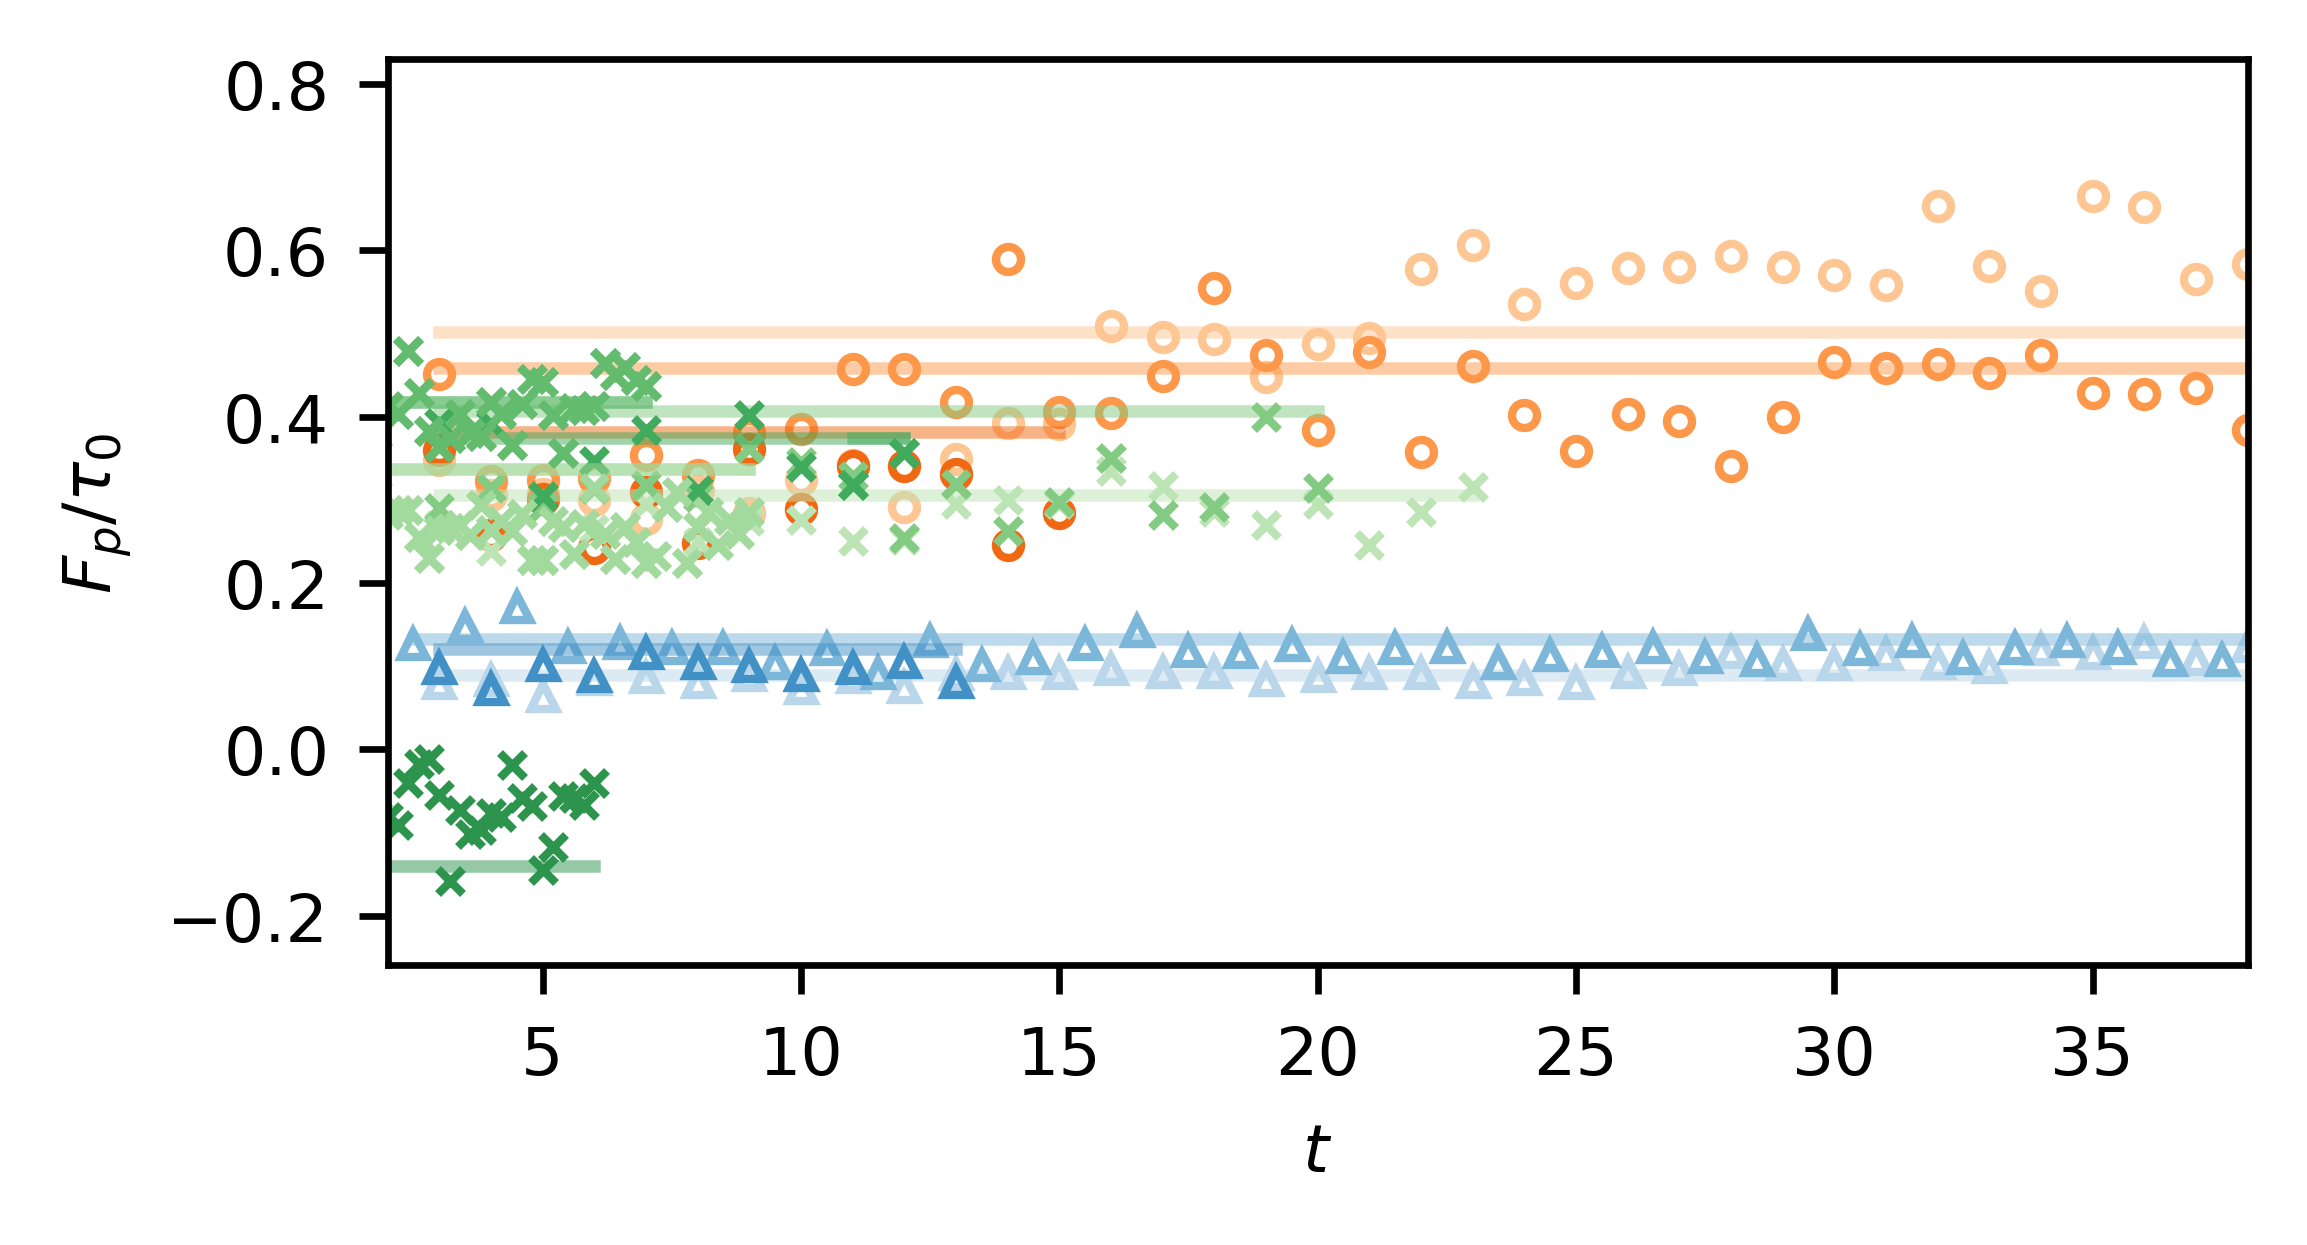

In [116]:
""" CHECK: one single psin vs Fp time sequence. """
plt.figure(figsize=[4,2])
for case in (case1,case2,case3,case4,case5,case6,case7,case8,case9,case10,case11,case12):
    case.tau0 = case.rho2*case.ustar**2
    plt.plot(case.p['t'][2:], case.Fp[2:]/case.tau0, marker=case.marker, mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=case.cc, alpha = 1)
    case.Fp_aver = np.average(case.Fp[2:])
    """ Assuming sinusoidal """
    case.psin = 0.5*np.average(case.pamp)*np.sin(np.average(case.dphase)/128*2*np.pi)*case.ak
    plt.plot(case.p['t'][2:], case.psin/case.tau0*np.ones(len(case.p['t'][2:])), color=case.cc, alpha = 0.5)
for case in (case8,case10,case11):
    case.tau0 = case.rho2*case.ustar**2
    plt.plot(case.p['t'][10:], case.Fp[10:]/case.tau0, marker=case.marker, mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=case.cc, alpha = 1)
    case.Fp_aver = np.average(case.Fp[10:])
    """ Assuming sinusoidal """
    case.psin = 0.5*np.average(case.pamp)*np.sin(np.average(case.dphase)/128*2*np.pi)*case.ak
    plt.plot(case.p['t'][10:], case.psin/case.tau0*np.ones(len(case.p['t'][10:])), color=case.cc, alpha = 0.5)
plt.xlabel(r'$t$')
plt.xlim([2,38])
plt.ylabel(r'$F_p/\tau_0$')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


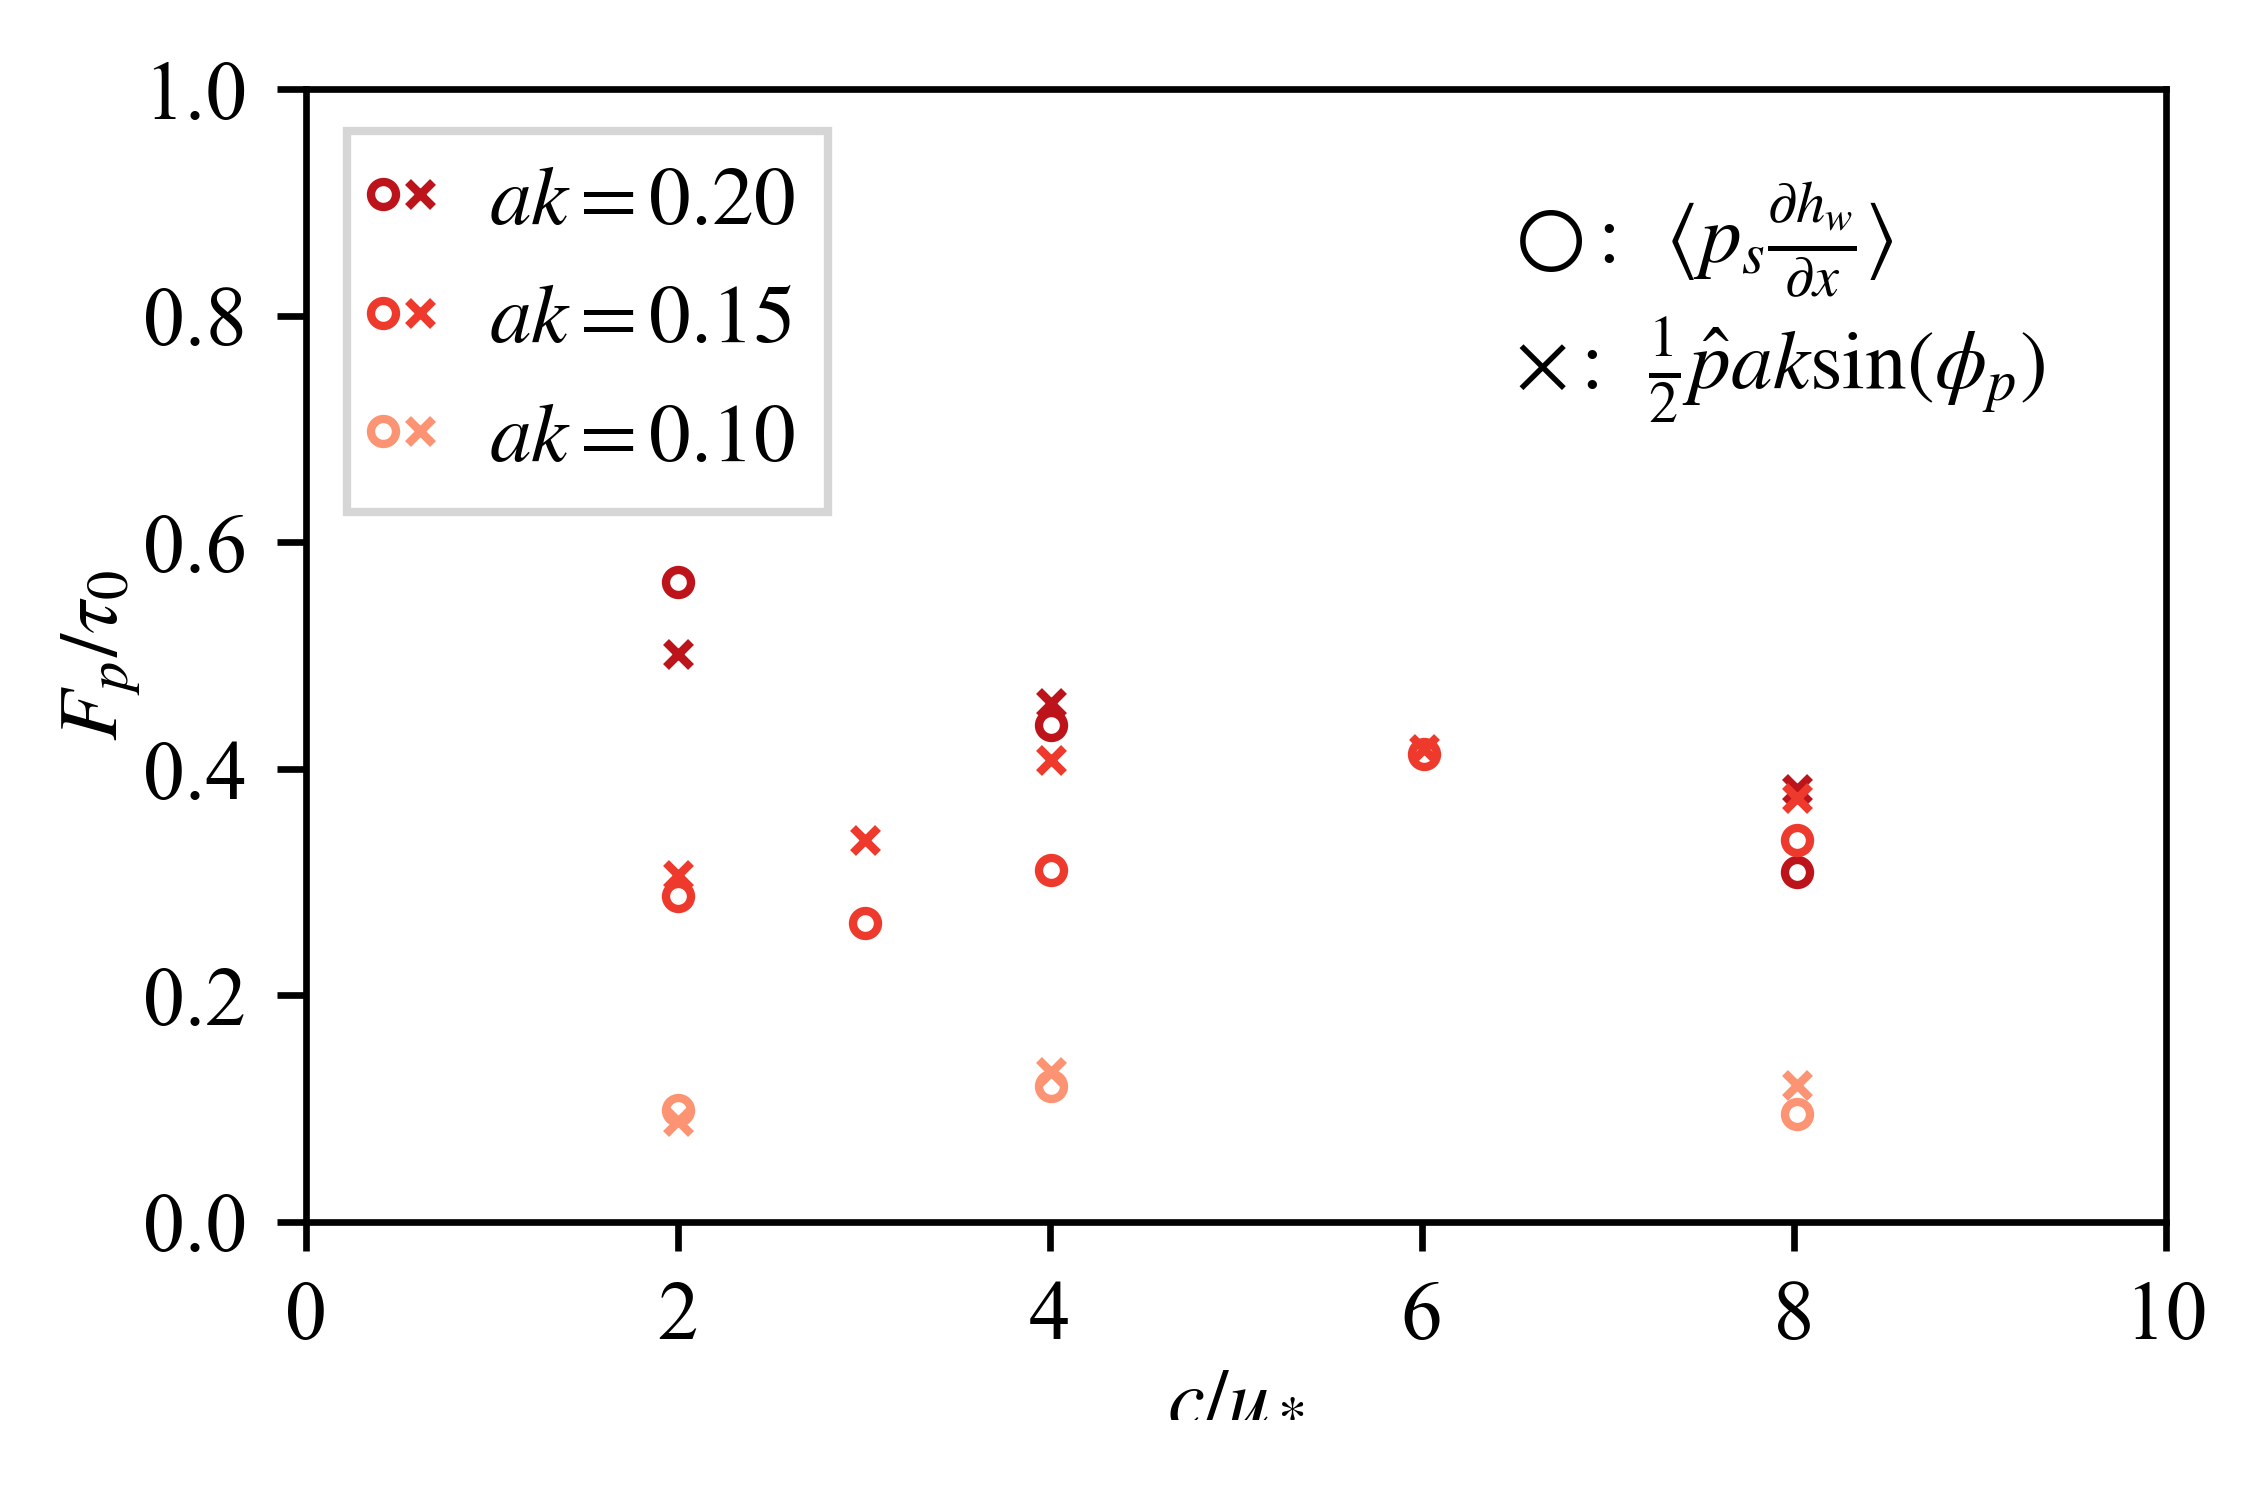

In [155]:
""" FIGURE: drag force as proportion of the total. """
fig = plt.figure(figsize=[4,2.5]); ax = plt.gca()

for case in (case1,case2,case3):
    p1, = plt.plot(case.wave.c/case.ustar, case.Fp_aver/case.tau0, marker='o', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), markeredgewidth=1, lw=0, markersize=3, color=cmap(39), alpha = 1)
    p2, = plt.plot(case.wave.c/case.ustar, case.psin/case.tau0, marker='x', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), markeredgewidth=1, lw=0, markersize=3, color=cmap(39), alpha = 1)

for case in (case7,case9,case8,case10,case11):
    p3, = plt.plot(case.wave.c/case.ustar, case.Fp_aver/case.tau0, marker='o', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), markeredgewidth=1, lw=0, markersize=3, color=cmap(37), alpha = 1)
    p4, = plt.plot(case.wave.c/case.ustar, case.psin/case.tau0, marker='x', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), markeredgewidth=1, lw=0, markersize=3, color=cmap(37), alpha = 1)

for case in (case4,case5,case6):
    p5, = plt.plot(case.wave.c/case.ustar, case.Fp_aver/case.tau0, marker='o', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), markeredgewidth=1, lw=0, markersize=3, color=cmap(34), alpha = 1)
    p6, = plt.plot(case.wave.c/case.ustar, case.psin/case.tau0, marker='x', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), markeredgewidth=1, lw=0, markersize=3, color=cmap(34), alpha = 1)
l = ax.legend([(p1, p2),(p3, p4),(p5, p6)], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
               handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper left', fancybox=False, handlelength=0.5)

ax.annotate(r'$\bigcirc: \;\; \langle p_s \frac{\partial h_w}{\partial x} \rangle$', xy=(0.65, 0.92), ha='left', va='top', xycoords='axes fraction')
ax.annotate(r'$\times: \;\; \frac{1}{2}\hat{p} ak \sin(\phi_p)$', xy=(0.65, 0.8), ha='left', va='top', xycoords='axes fraction')

plt.xlabel(r'$c/u_*$', labelpad=0)
plt.ylim([0,1])
plt.xlim([0,10])
plt.ylabel(r'$F_p/\tau_0$', labelpad=0)
# fig.savefig('figures/drag_coefficient_check.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/drag_coefficient_waveage.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/drag_coefficient_waveage.eps', bbox_inches='tight', pad_inches=0.1)

In [27]:
""" PROCESSING """
import pandas as pd
Grare = pd.read_csv('otherdata/Grare2009.csv', names=['ak', 'drag'], delimiter = ',')
Peirson = pd.read_csv('otherdata/Peirson2014.csv', names=['ak', 'drag'], delimiter = ',')
Veron = pd.read_csv('otherdata/Veron2020.csv', names=['ak', 'drag'], delimiter = ',')
Masterboenk = pd.read_csv('otherdata/Masterboenk1996.csv', names=['ak', 'drag'], delimiter = ',')

for case in (case1,case2,case3,case4,case5,case6,case7,case9,case8,case10,case11,case12):
    case.Fp_aver = np.average(case.Fp[10:])
for case in (case13,case14):
    case.Fp_aver = np.average(case.Fp[2:])

0.007725403370432651
1.3001735761249532e-05


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


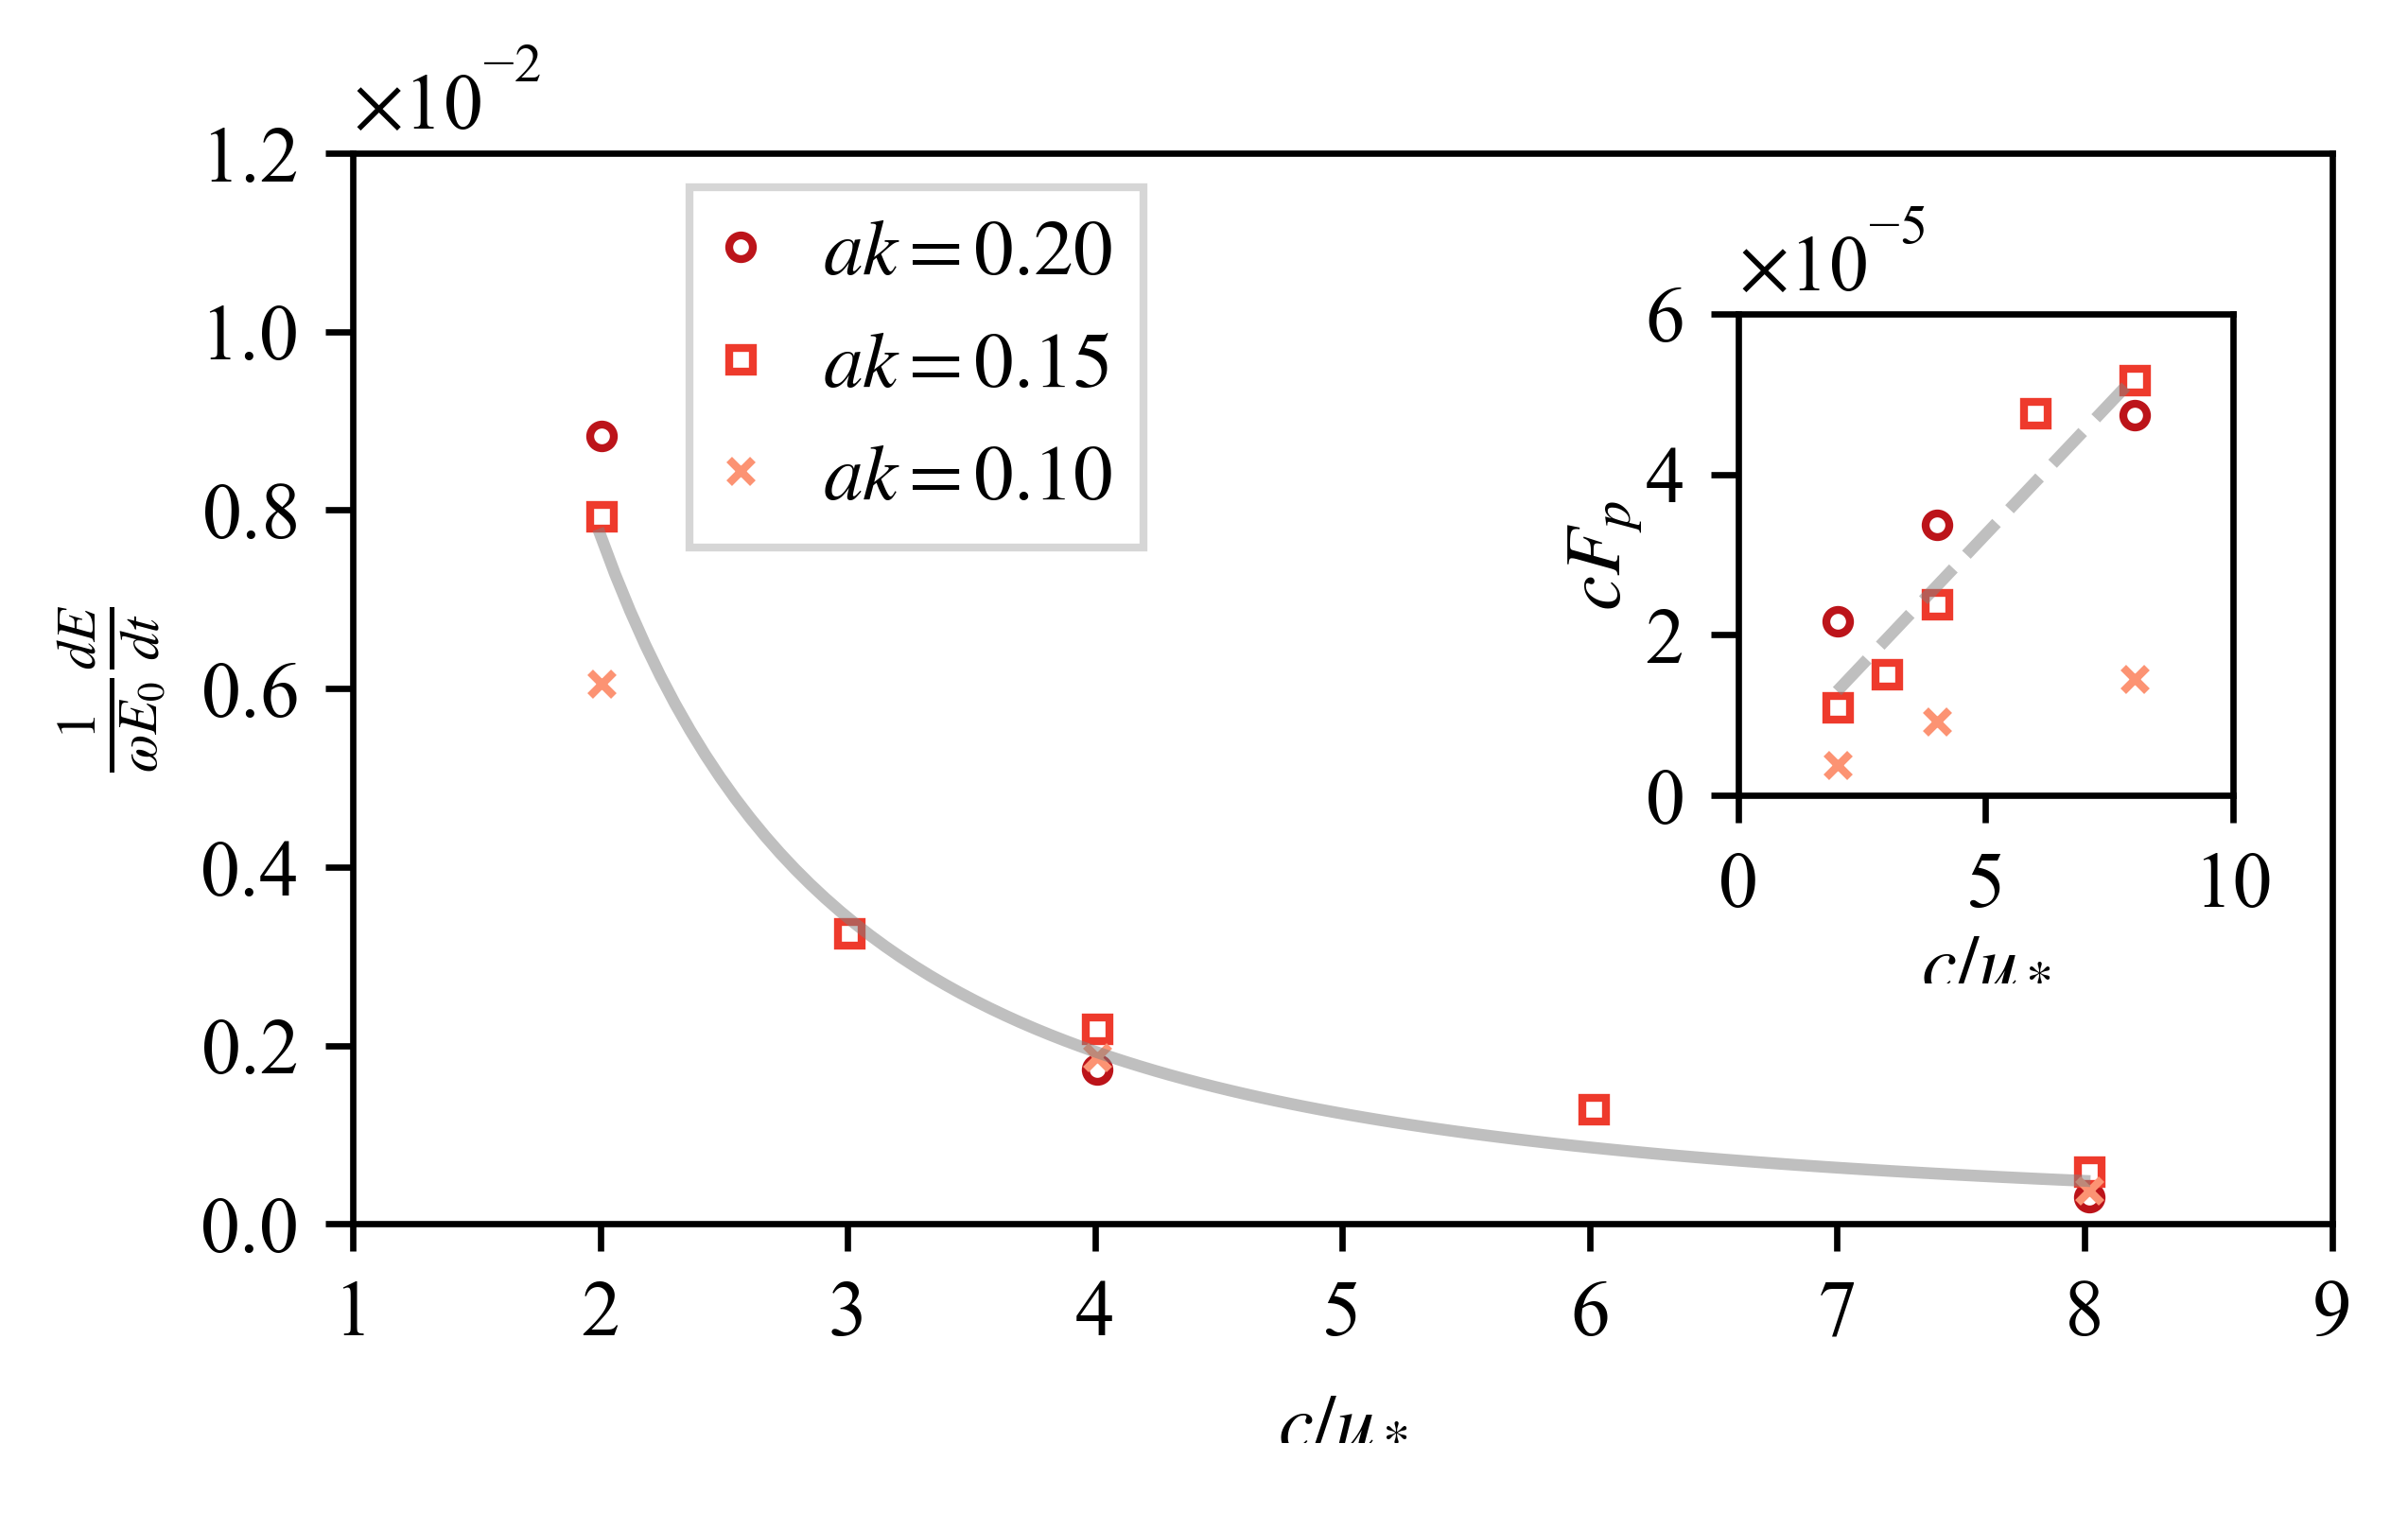

In [145]:
""" FIGURE: Fp*c and dE/dt """
fig = plt.figure(figsize=[4.5,2.5]); ax1 = plt.gca()
# Manually set the position and relative size of the inset axes within ax1
ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.7,0.4,0.25,0.45])
ax2.set_axes_locator(ip)

""" Normalized in a commonly seen way """
for case in (case1,case2,case3):
    p1, = ax1.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='o', mfc='none',
                   lw=0, markersize=3, color=cmap(39), alpha = 1)
for case in (case7,case9,case8,case10,case11):
    p3, = ax1.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='s', mfc='none',
                   lw=0, markersize=3, color=cmap(37), alpha = 1)
for case in (case4,case5,case6):
    p5, = ax1.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='x', mfc='none',
                   lw=0, markersize=3, color=cmap(34), alpha = 1)
# for case in (case13,case14):
#     p7, = ax1.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='x', mfc='none',
#                    lw=0, markersize=3, color=cmap(6), alpha = 1)
    
l = ax1.legend([(p1),(p3),(p5)], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
               handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.15, 0.8), fancybox=False, handlelength=0.5)

x1 = np.linspace(2,8,100)
case = case1
y1 = 3.5*(1/x1)**2*case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega
print(y1[0])
ax1.plot(x1, y1, c='gray',alpha=0.5)

""" Inset: Normalized in another way """

for case in (case1,case2,case3):
    p1, = ax2.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c, marker='o', mfc='none',
                   lw=0, markersize=3, color=cmap(39), alpha = 1)
for case in (case7,case9,case8,case10,case11):
    p3, = ax2.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c, marker='s', mfc='none',
                   lw=0, markersize=3, color=cmap(37), alpha = 1)
for case in (case4,case5,case6):
    p5, = ax2.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c, marker='x', mfc='none',
                   lw=0, markersize=3, color=cmap(34), alpha = 1)
# for case in (case13,case14):
#     p7, = ax2.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c, marker='x', mfc='none',
#                    lw=0, markersize=3, color=cmap(6), alpha = 1)
x1 = np.linspace(2,8,100)
case = case1
y1 = 0.3*x1*case.Fp_aver*case.wave.c
print(y1[0])
ax2.plot(x1, y1, c='gray', linestyle='--', alpha=0.5)

ax1.set_xlim([1,9])
ax1.set_ylim([0,1.2*10**(-2)])
ax2.set_xlim([0,10])
ax2.set_ylim([0,6*10**(-5)])
ax1.set_xlabel(r'$c/u_*$')
ax1.set_ylabel(r'$\frac{1}{\omega E_0}\frac{dE}{dt}$')
ax2.set_xlabel(r'$c/u_*$', labelpad=0)
ax2.set_ylabel(r'$cF_p$', labelpad=0)
ax1.set_xticks(np.arange(1,10,1))
ax1.set_yticks(np.arange(0,1.4,0.2)*10**(-2))
formatter1 = ticker.ScalarFormatter(useMathText=True)
formatter1.set_scientific(True) 
formatter1.set_powerlimits((-1,1)) 
formatter2 = ticker.ScalarFormatter(useMathText=True)
formatter2.set_scientific(True) 
formatter2.set_powerlimits((-1,1)) 
ax1.yaxis.set_major_formatter(formatter1) 
ax2.yaxis.set_major_formatter(formatter2) 
fig.savefig('figures_jfm/energy_rate.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/energy_rate.eps', bbox_inches='tight', pad_inches=0.1)

In [ ]:
""" FIGURE: put the growth rate in the frame of Plant etc """


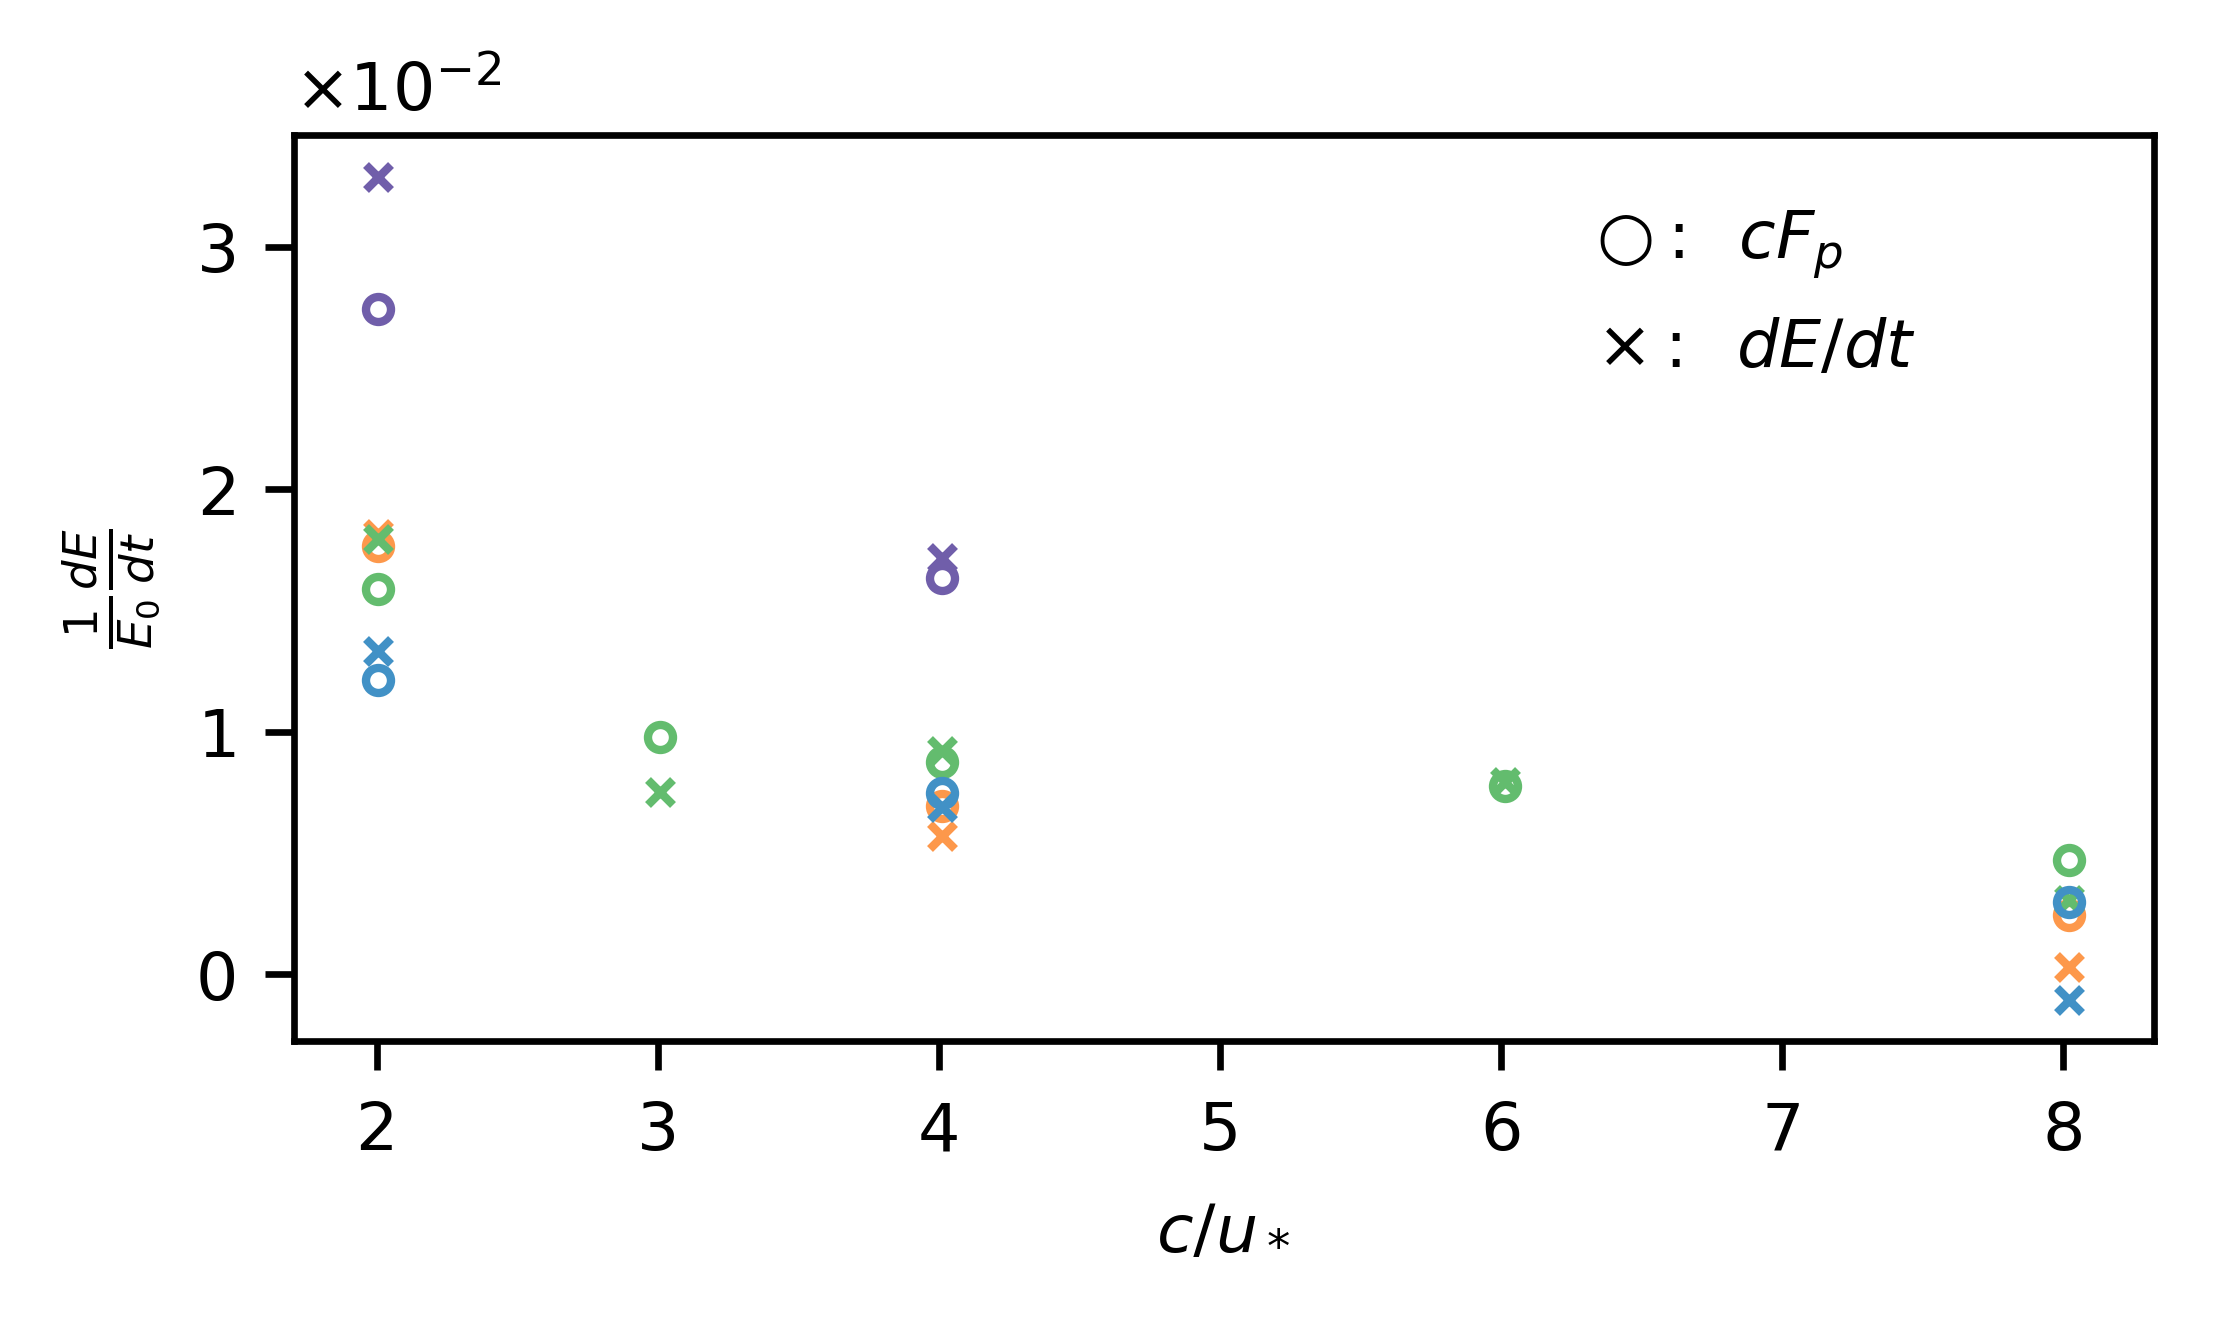

In [44]:
""" FIGURE: Fp*c and dE/dt """
fig = plt.figure(figsize=[4,2]); ax = plt.gca()

for case in (case1,case2,case3):
    p1, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0], marker='o', mfc='none',
                   label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(27), alpha = 1)
    case.Erate_aver = (case.E_rms[-1]-case.E_rms[0])/(case.phase['t'][-1]-case.phase['t'][0])
    p2, = plt.plot(case.wave.c/case.ustar, case.Erate_aver/case.E_rms[0], marker='x', mfc='none',
                   label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(27), alpha = 1)
#     p2, = plt.plot(case.wave.c/case.ustar, np.average(case.E_rate)/case.E_rms[0]/case.wave.omega, marker='x', mfc='none',
#              label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(27), alpha = 1)

for case in (case7,case9,case8,case10,case11):
    p3, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0], marker='o', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(20), alpha = 1)
    case.Erate_aver = (case.E_rms[-1]-case.E_rms[0])/(case.phase['t'][-1]-case.phase['t'][0])
    p4, = plt.plot(case.wave.c/case.ustar, case.Erate_aver/case.E_rms[0], marker='x', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(20), alpha = 1)

for case in (case4,case5,case6):
    p5, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0], marker='o', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(13), alpha = 1)
    case.Erate_aver = (case.E_rms[-1]-case.E_rms[0])/(case.phase['t'][-1]-case.phase['t'][0])
    p6, = plt.plot(case.wave.c/case.ustar, case.Erate_aver/case.E_rms[0], marker='x', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(13), alpha = 1)
# l = ax.legend([(p1, p2),(p3, p4),(p5, p6)], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
#                handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper left')

for case in (case13,case14):
    p5, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/case.E_rms[0], marker='o', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(6), alpha = 1)
    case.Erate_aver = (case.E_rms[-1]-case.E_rms[0])/(case.phase['t'][-1]-case.phase['t'][0])
    p6, = plt.plot(case.wave.c/case.ustar, case.Erate_aver/case.E_rms[0], marker='x', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(6), alpha = 1)

ax.annotate(r'$\bigcirc: \;\; cF_p$', xy=(0.7, 0.92), ha='left', va='top', xycoords='axes fraction')
ax.annotate(r'$\times: \;\; dE/dt$', xy=(0.7, 0.8), ha='left', va='top', xycoords='axes fraction')

plt.xlabel(r'$c/u_*$')
# plt.ylim([0,1])
plt.ylabel(r'$\frac{1}{E_0}\frac{dE}{dt}$')
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
fig.savefig('figures/energy_rate_2.pdf', bbox_inches='tight', pad_inches=0.1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


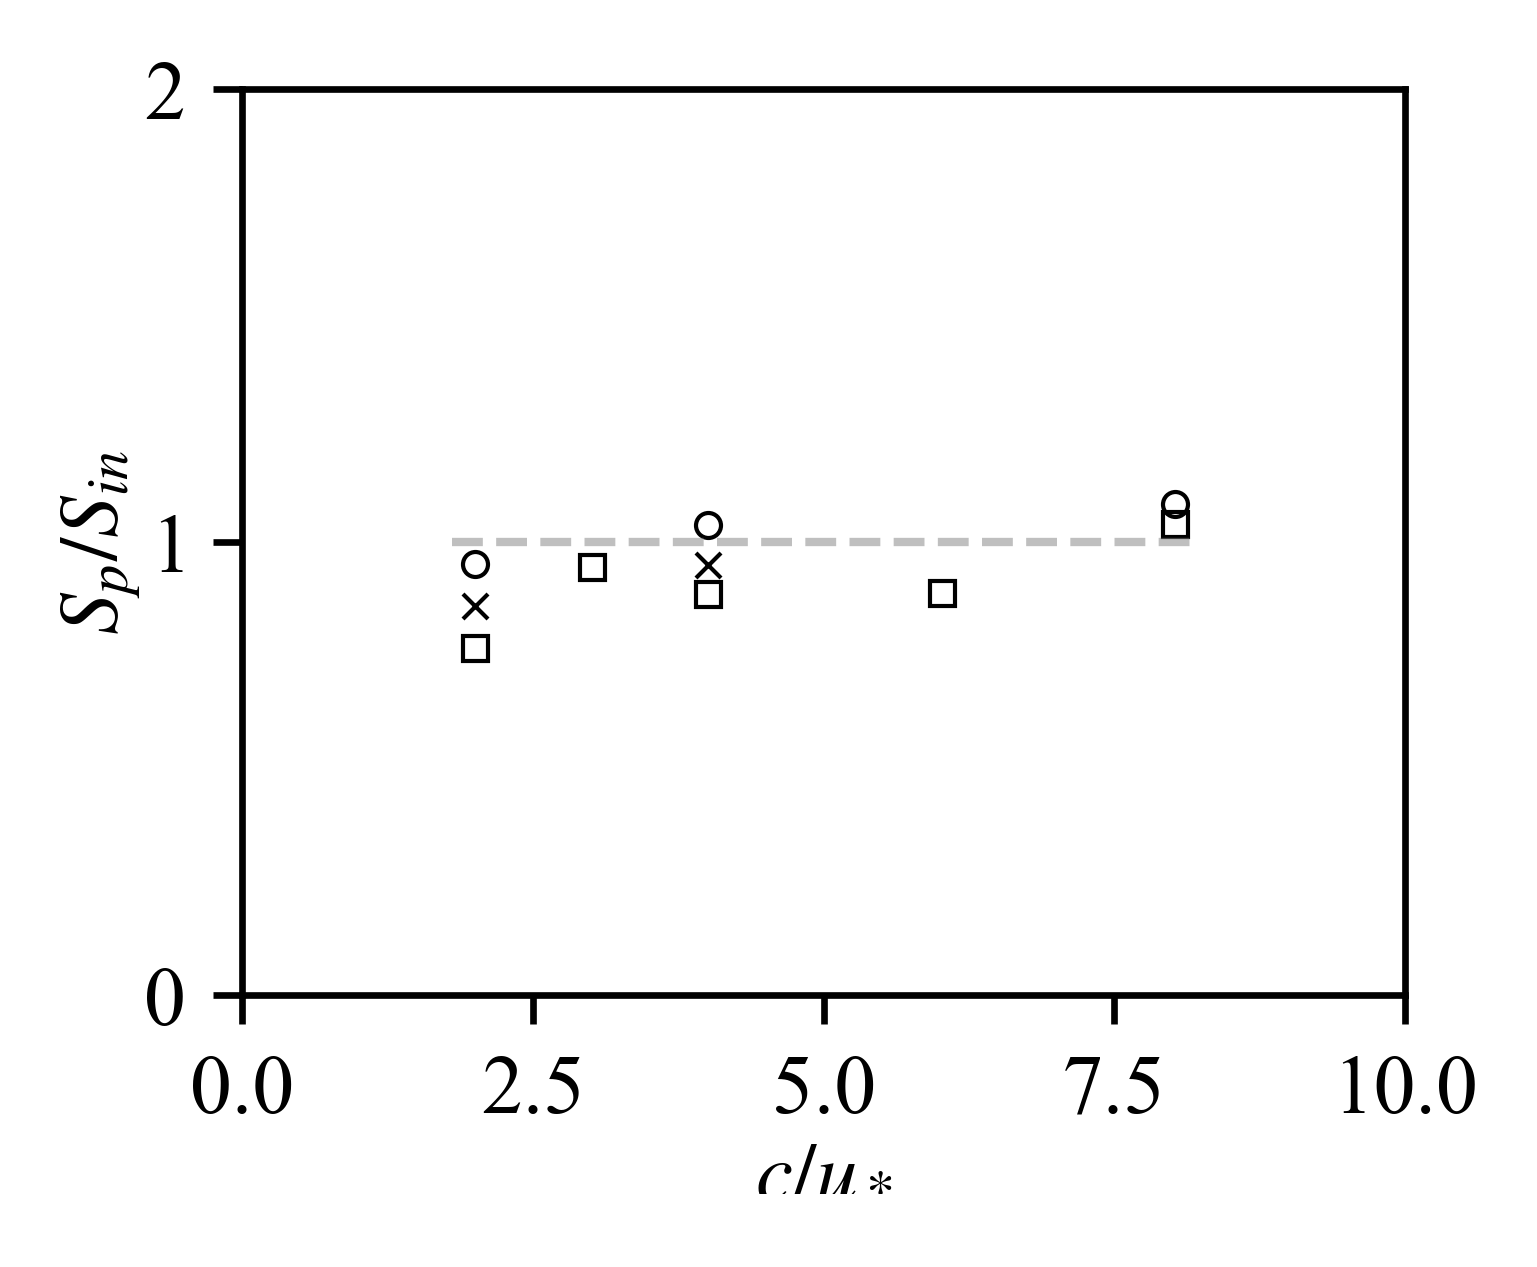

In [182]:
""" FIGURE: Fp*c / dE/dt ratio """
fig = plt.figure(figsize=[2.5,2]); ax = plt.gca()

for case in (case1,case2,case3):
    case.Erate_aver = (case.E_rms[-1]-case.E_rms[0])/(case.phase['t'][-1]-case.phase['t'][0])
#     print(case.Erate_aver/case.E_rms[0])
#     print(4*case.mu1/case.rho1*case.k**2)
#     print(4*6.1*10**(-5)*case.wave.omega)
    p2, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.Erate_aver+case.E_rms[0]*4*case.mu1/case.rho1*case.k**2), marker='o', mfc='none',
                   lw=0, markersize=3, color='k', alpha = 1, markeredgewidth=0.5)
    
for case in (case7,case9,case8,case10,case11):
    case.Fp_aver = np.average(case.Fp[10:])
    case.Erate_aver = (case.E_rms[-10]-case.E_rms[10])/(case.phase['t'][-10]-case.phase['t'][10])
    p4, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.Erate_aver+case.E_rms[0]*4*case.mu1/case.rho1*case.k**2), marker='s', mfc='none',
                   lw=0, markersize=3, color='k', alpha = 1, markeredgewidth=0.5)

for case in (case4,case5,case6):
    case.Fp_aver = np.average(case.Fp[5:])
    case.Erate_aver = (case.E_rms[-1]-case.E_rms[0])/(case.phase['t'][-1]-case.phase['t'][0])
    p6, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.Erate_aver+case.E_rms[0]*4*case.mu1/case.rho1*case.k**2), marker='x', mfc='none',
                   lw=0, markersize=3, color='k', alpha = 1, markeredgewidth=0.5)
    
# for case in (case13,case14):
#     case.Fp_aver = np.average(case.Fp[2:])
#     case.Erate_aver = (case.E_rms[-1]-case.E_rms[0])/(case.phase['t'][-1]-case.phase['t'][0])
#     p8, = plt.plot(case.wave.c/case.ustar, case.Fp_aver*case.wave.c/(case.Erate_aver+case.E_rms[0]*4*case.mu1/case.rho1*case.k**2), marker='^', mfc='none',
#                    lw=0, markersize=3, color='k', alpha = 1)

# l = ax.legend([p2,p4,p6], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
#                handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper left', fancybox=False)

plt.plot(np.linspace(1.8,8.2,20), np.ones(20), '--', c='gray', alpha=0.5, linewidth=1)
plt.xlabel(r'$c/u_*$', labelpad=0)
plt.ylim([0, 2])
plt.xlim([0, 10])
plt.yticks(np.arange(0,3,1))
plt.ylabel(r'$S_p/S_{in}$', labelpad=0)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
fig.savefig('figures_jfm/cFp_over_dEdt.eps', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/cFp_over_dEdt.pdf', bbox_inches='tight', pad_inches=0.1)

### Some visulization of the pressure patterns
This is done on one case with averaged pressure. Pick one case.

In [163]:
""" Interpolate the pressure (averaged already). """
case = case2
from coordinate import array_newcoord
p2D_aver = np.average(case.p_2D, axis=0) # Averaged air pressure, p_2D has already gone through *f and -average
eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1 # Last frame of eta
p2D_aver_interp, zgrid = array_newcoord(p2D_aver, case=case, eta=eta)

In [ ]:
# How to speed up matplotlib
# https://stackoverflow.com/questions/8955869/why-is-plotting-with-matplotlib-so-slow
from matplotlib import animation
from IPython.display import HTML

# Single animation generation function
def plot_animation(animate_function, frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate    
    fig = plt.figure(figsize = [4,2]); ax = plt.gca()
    ax.set_ylabel(r'$p/\rho_a u_*^2$')
    ax.set_xlabel(r'$x/\lambda$')

    # animation function.  This is called sequentially
    def animate(i):
        ax.clear()
        imgplot = animate_function(i, ax)
        ax.text(0.1, 0.95, r'$t = %g$' %i, ha='center', va='center', fontsize=6,
        color='gray', transform=ax.transAxes)
        ax.set_title('$c/u_* = %.0f, ak = %g$' %(case.wave.c/case.ustar, case.ak))
        return imgplot,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = True)  
    return anim

# Define the function called at every animation time to read in images
def plot_func(i, ax):
    p2D_interp, zgrid = array_newcoord(case.p_2D[i], case=case, eta=eta)
    """ FIGURE: Show the 1D distribution of pressure at different height. """
    plt.figure(figsize = [4,2])
    for i in range (0,4):
        p1D_smooth = savgol_filter(p2D_interp[:,85+i*5], 21, 4)
        ax.plot(xarray/(2*np.pi/case.k), p1D_smooth/case.tau0, c=plt.cm.get_cmap('Greens')(1-i/4))
        ax.plot(np.ones(20)*(i-1.25), np.linspace(-10,10,20),'--', c='gray', lw=1)
        ax.text(0.25, 0.95, r'$\Delta \phi = 90 \degree $', ha='center', va='center', fontsize=6,
                color='gray', transform=ax.transAxes)
    ax.set_ylim([-10,10]); ax.set_xlim([-2,2])
    img, = ax.plot(xarray/(2*np.pi/case.k), (eta)*case.k*2, c='gray', alpha=0.5)
    return img

anim = plot_animation(plot_func, frame_number = len(case.p['t']), interval_time = 200) # Specify frame number
HTML(anim.to_html5_video())

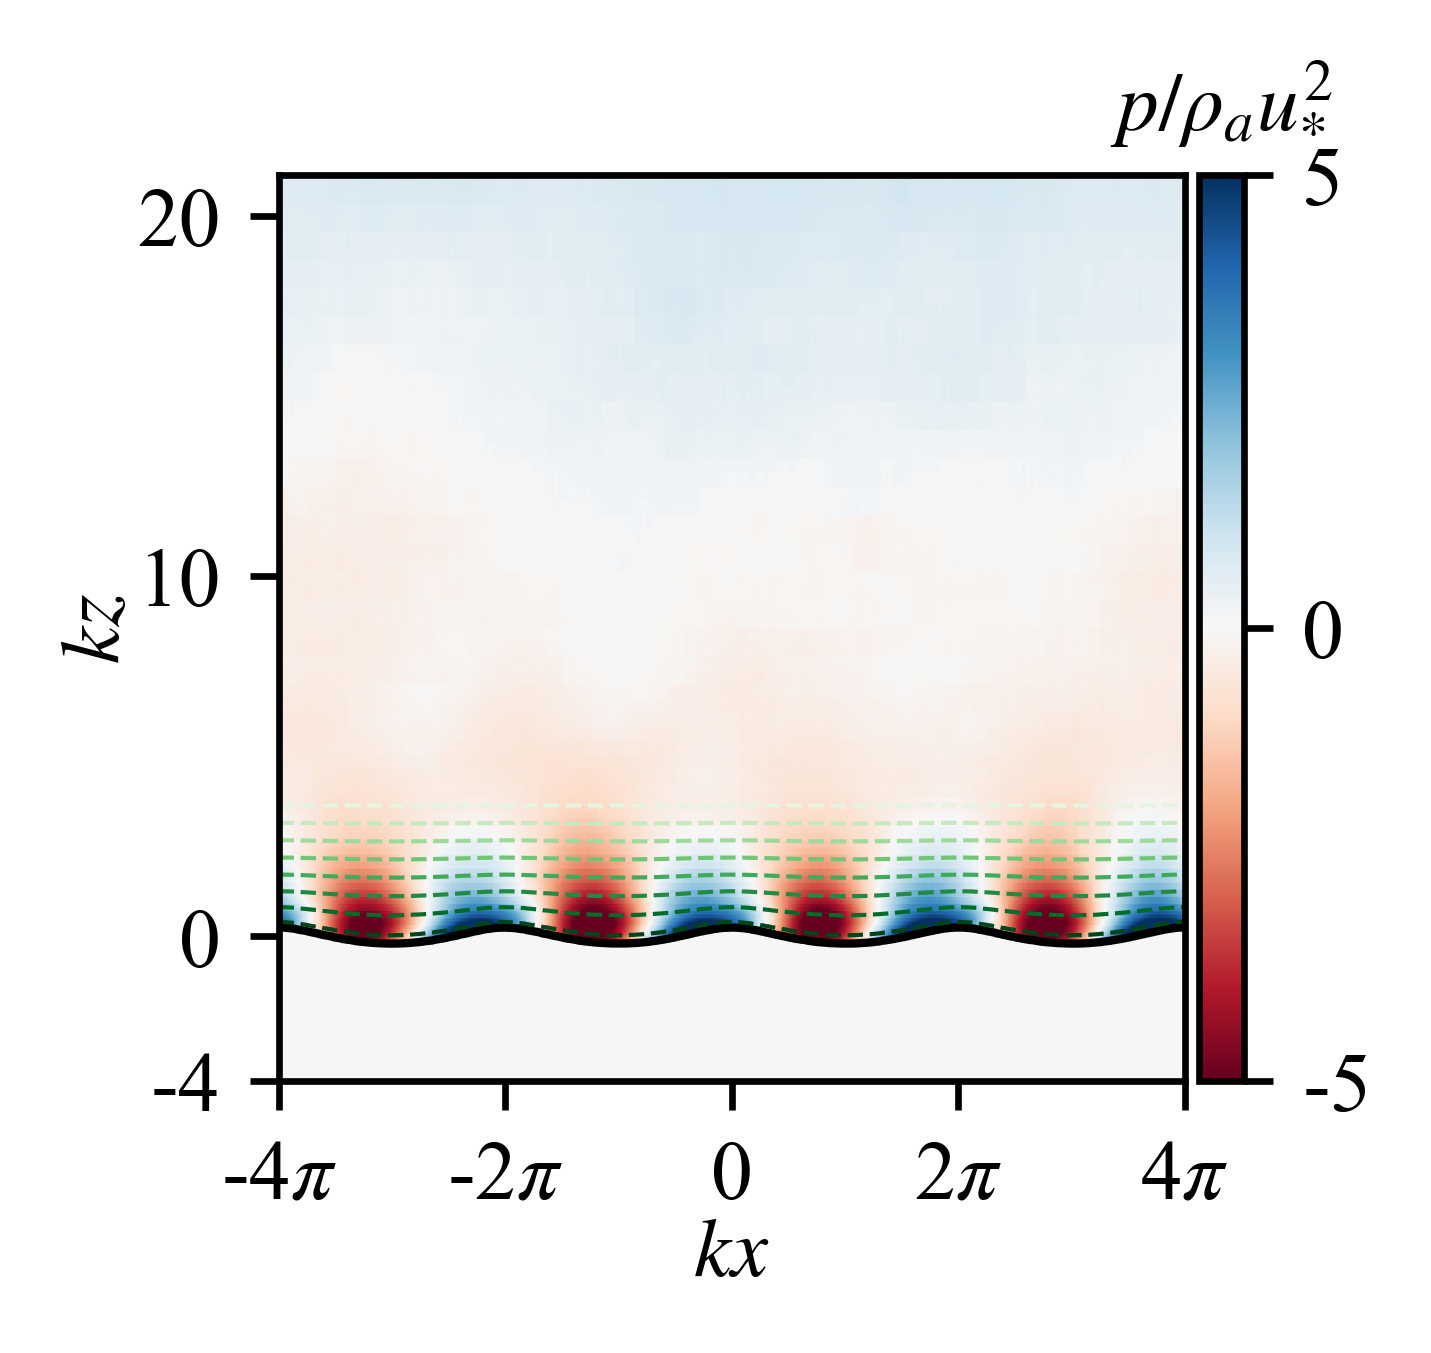

In [164]:
""" FIGURE(1/2): Plot of the pressure in the original coordinate. """
fig = plt.figure(figsize=[3,2]); ax = plt.gca()
case.tau0 = case.ustar**2*case.rho2

""" Instantanous """
# img = plt.imshow(np.rot90(case.p_2D[i]/case.tau0), cmap='RdBu', extent=[-np.pi,np.pi,0,2*np.pi], vmax=5, vmin=-5)
""" Averaged """
img = plt.imshow(np.rot90(p2D_aver)/case.tau0, cmap='RdBu', extent=[-4*np.pi,4*np.pi,-4,8*np.pi-4], vmax=5, vmin=-5)
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
xarray = np.linspace(-np.pi, np.pi, 512)*4
eta = np.roll(np.average(case.phase['eta'][-1], axis=0), -case.phase['idx'][-1], axis=0) - 1
plt.plot(xarray, eta*4, 'k', lw=1)
for i in range (0,8):
    plt.plot(xarray, (zgrid[:,85+i*10])*4, '--', c=plt.cm.get_cmap('Greens')(1-i/8), lw=0.5)
    
# img = plt.imshow(np.rot90(p2D_aver_interp/case.tau0), cmap='RdBu', extent=[-4*np.pi,4*np.pi,-4,8*np.pi-4], vmax=5, vmin=-5)
# cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
# xarray = np.linspace(-np.pi, np.pi, 512)*4
# plt.plot(xarray, np.ones(512)*0, c='k', lw=1)
# for i in range (0,8):
#     plt.plot(xarray, np.ones(512)*((85+i*5)/512)*8*np.pi-4, '--', c=plt.cm.get_cmap('Greens')(1-i/8), lw=0.5)

plt.xlabel(r'$kx$', labelpad=0)
plt.ylabel(r'$kz$', labelpad=0)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.set_yticks((-4, 0, 10, 20))
ax.set_xlim([-4*np.pi,4*np.pi]); ax.set_ylim([-4,8*np.pi-4])
cbar.set_ticks([-5,0,5])
cbar.set_ticklabels([-5,0,5])
cbar.ax.text(0.5, 1.08, r'$p/\rho_a u_{*}^2$', ha='center', va='center', transform=cbar.ax.transAxes)
fig.savefig('figures_jfm/pressure_colormap1.pdf', bbox_inches='tight', pad_inches=0.1)

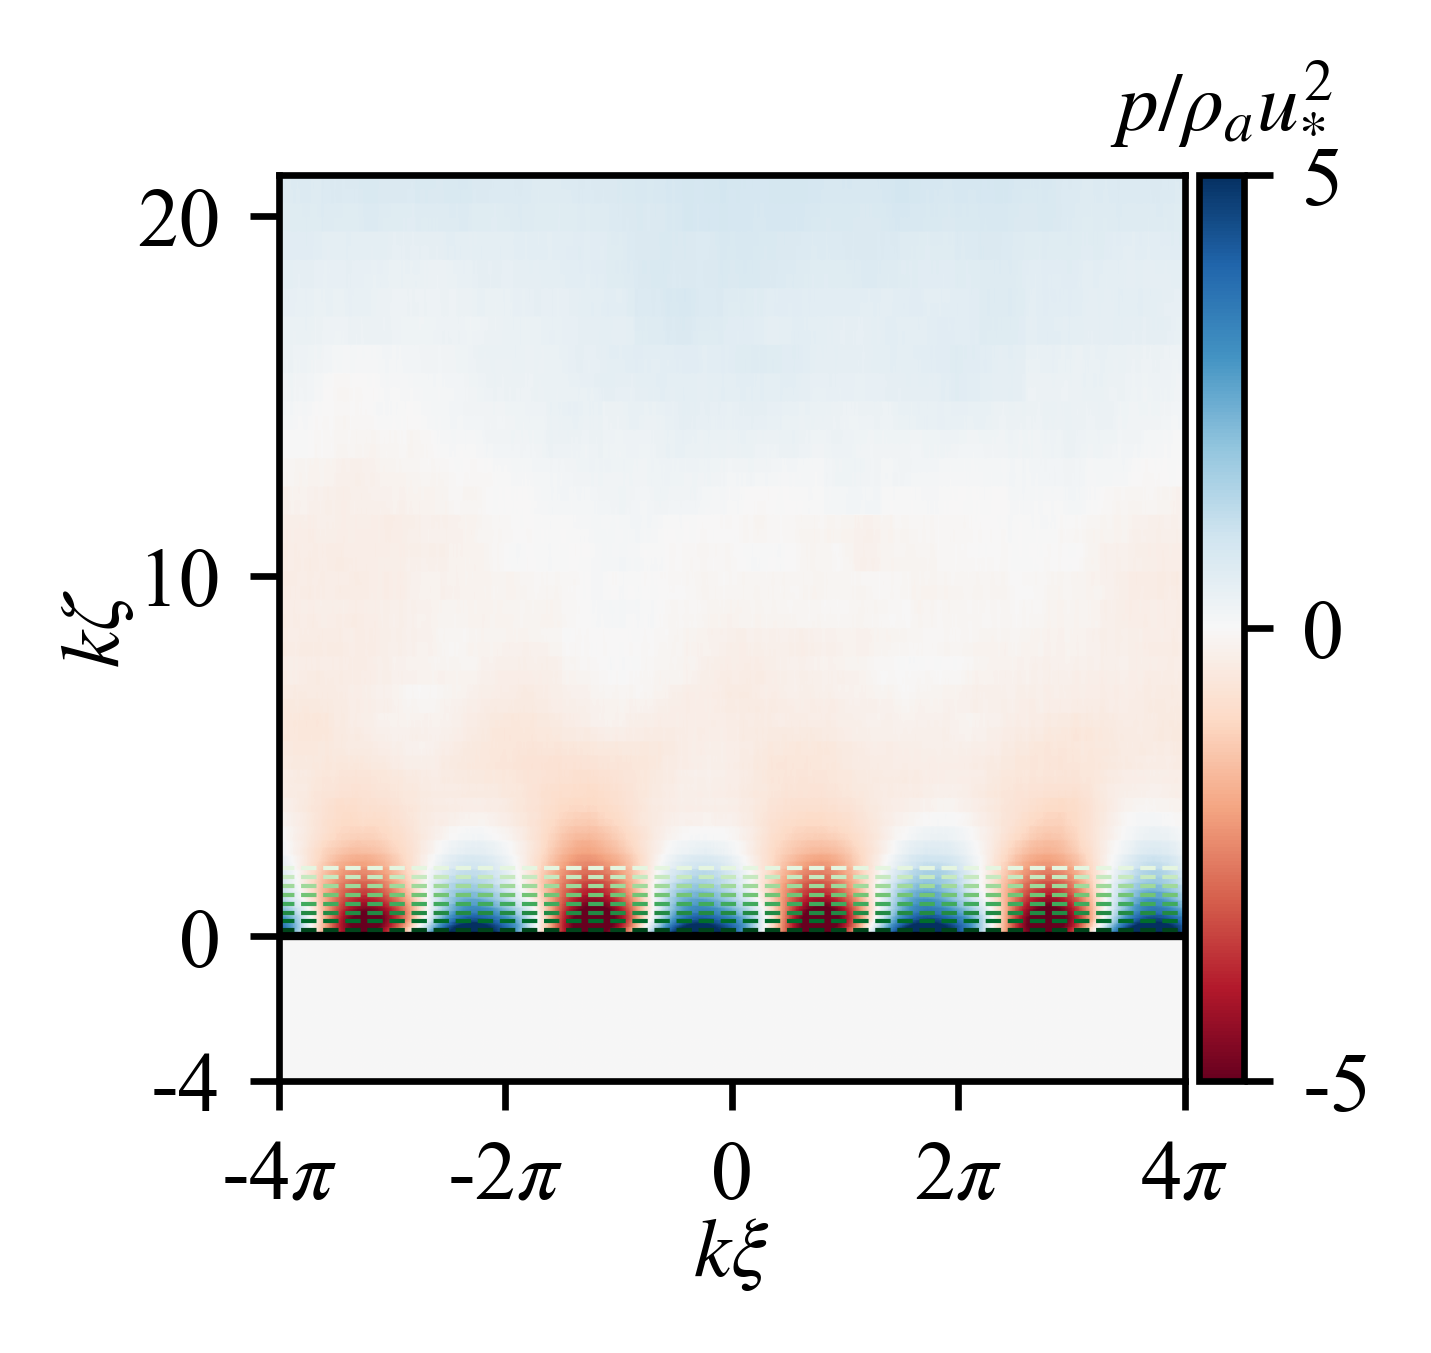

In [165]:
""" FIGURE(2/2): Plot of the pressure in the transformed coordinate. """
fig = plt.figure(figsize=[3,2]); ax=plt.gca()

""" Averaged """
img = plt.imshow(np.rot90(p2D_aver_interp/case.tau0), cmap='RdBu', extent=[-4*np.pi,4*np.pi,-4,8*np.pi-4], vmax=5, vmin=-5)
cbar = fig.colorbar(img, orientation="vertical", pad=0.01)
xarray = np.linspace(-np.pi, np.pi, 512)*4
plt.plot(xarray, np.ones(512)*0, c='k', lw=1)
for i in range (0,8):
    plt.plot(xarray, np.ones(512)*((85+i*5)/512)*8*np.pi-4, '--', c=plt.cm.get_cmap('Greens')(1-i/8), lw=0.5)
    
# plt.axis('off')
plt.xlabel(r'$k\xi$', labelpad=0)
plt.ylabel(r'$k\zeta$', labelpad=0)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.set_yticks((-4, 0, 10, 20))
ax.set_xlim([-4*np.pi,4*np.pi]); ax.set_ylim([-4,8*np.pi-4])
cbar.set_ticks([-5,0,5])
cbar.set_ticklabels([-5,0,5])
cbar.ax.text(0.5, 1.08, r'$p/\rho_a u_{*}^2$', ha='center', va='center', transform=cbar.ax.transAxes)
fig.savefig('figures_jfm/pressure_colormap2.pdf', bbox_inches='tight', pad_inches=0.1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


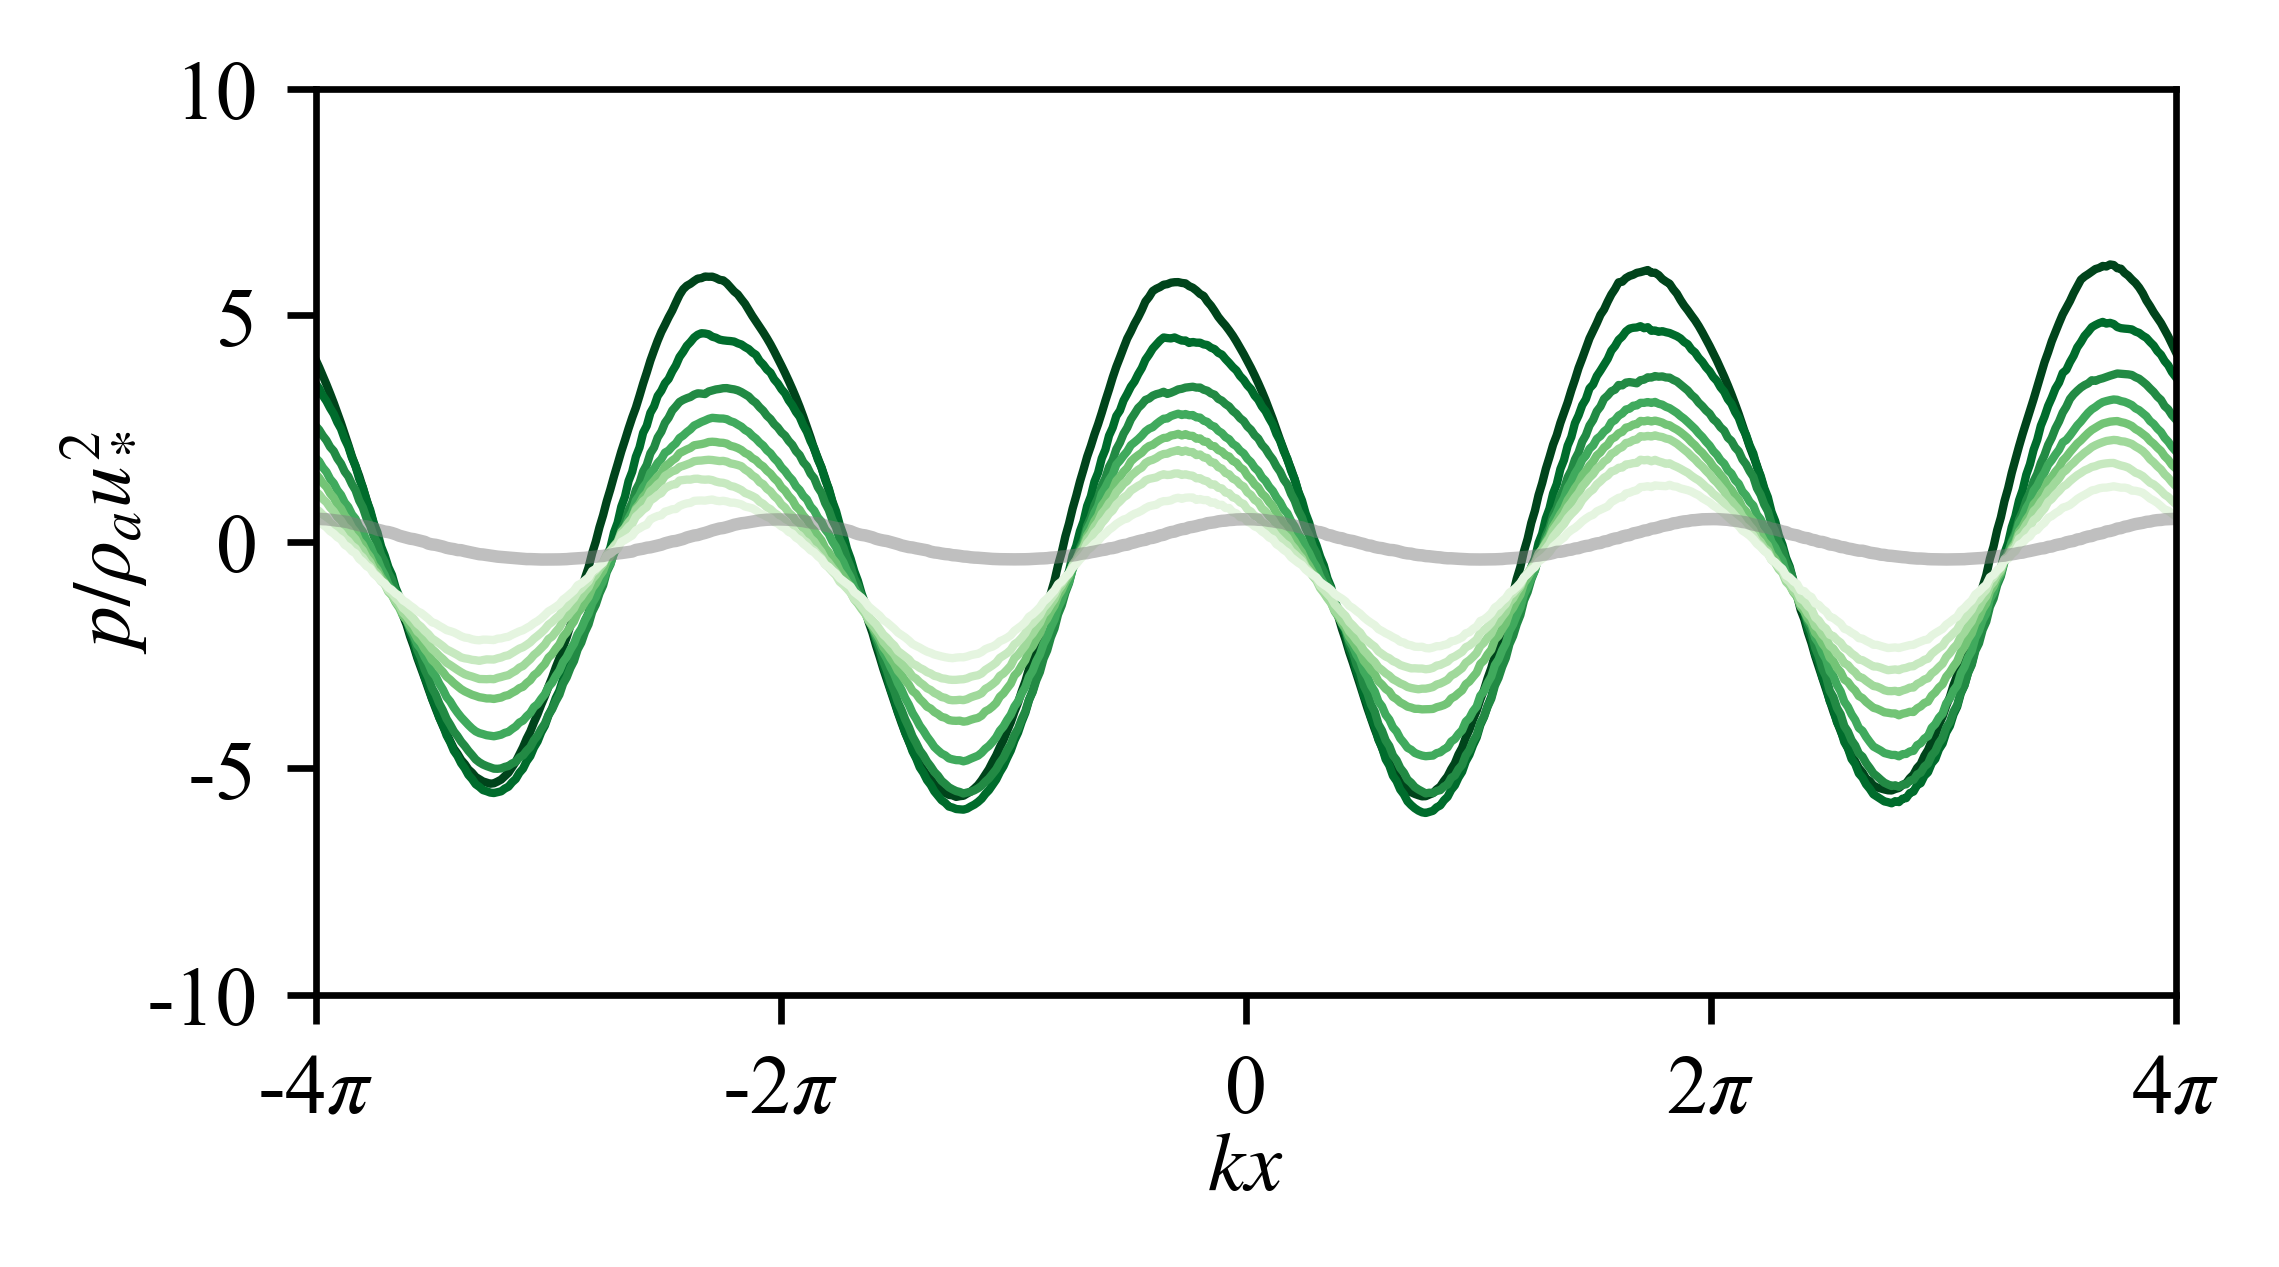

In [168]:
""" FIGURE: Show the 1D distribution of pressure at different height. """
fig = plt.figure(figsize = [4,2]); ax = plt.gca()
xarray = np.linspace(-np.pi, np.pi, 512)*4
for i in range (0,8):
    plt.plot(xarray, p2D_aver_interp[:,85+i*5]/case.tau0, c=plt.cm.get_cmap('Greens')(1-i/8), lw=1)

plt.plot(xarray, (eta)*case.k*2, c='gray', alpha=0.5)

plt.ylabel(r'$p/\rho_a u_*^2$', labelpad=0)
plt.xlabel(r'$kx$', labelpad=0)

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.set_yticks((-10, -5, 0, 5, 10))
ax.set_xlim([-4*np.pi,4*np.pi]); ax.set_ylim([-10,10])
cbar.set_ticks([-5,0,5])
cbar.set_ticklabels([-5,0,5])
cbar.ax.text(0.5, 1.08, r'$p/\rho_a u_{*}^2$', ha='center', va='center', transform=cbar.ax.transAxes)
fig.savefig('figures_jfm/pressure_1d_vertical.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/pressure_1d_vertical.eps', bbox_inches='tight', pad_inches=0.1)

### Amplitude and phase

(0, 0.3)

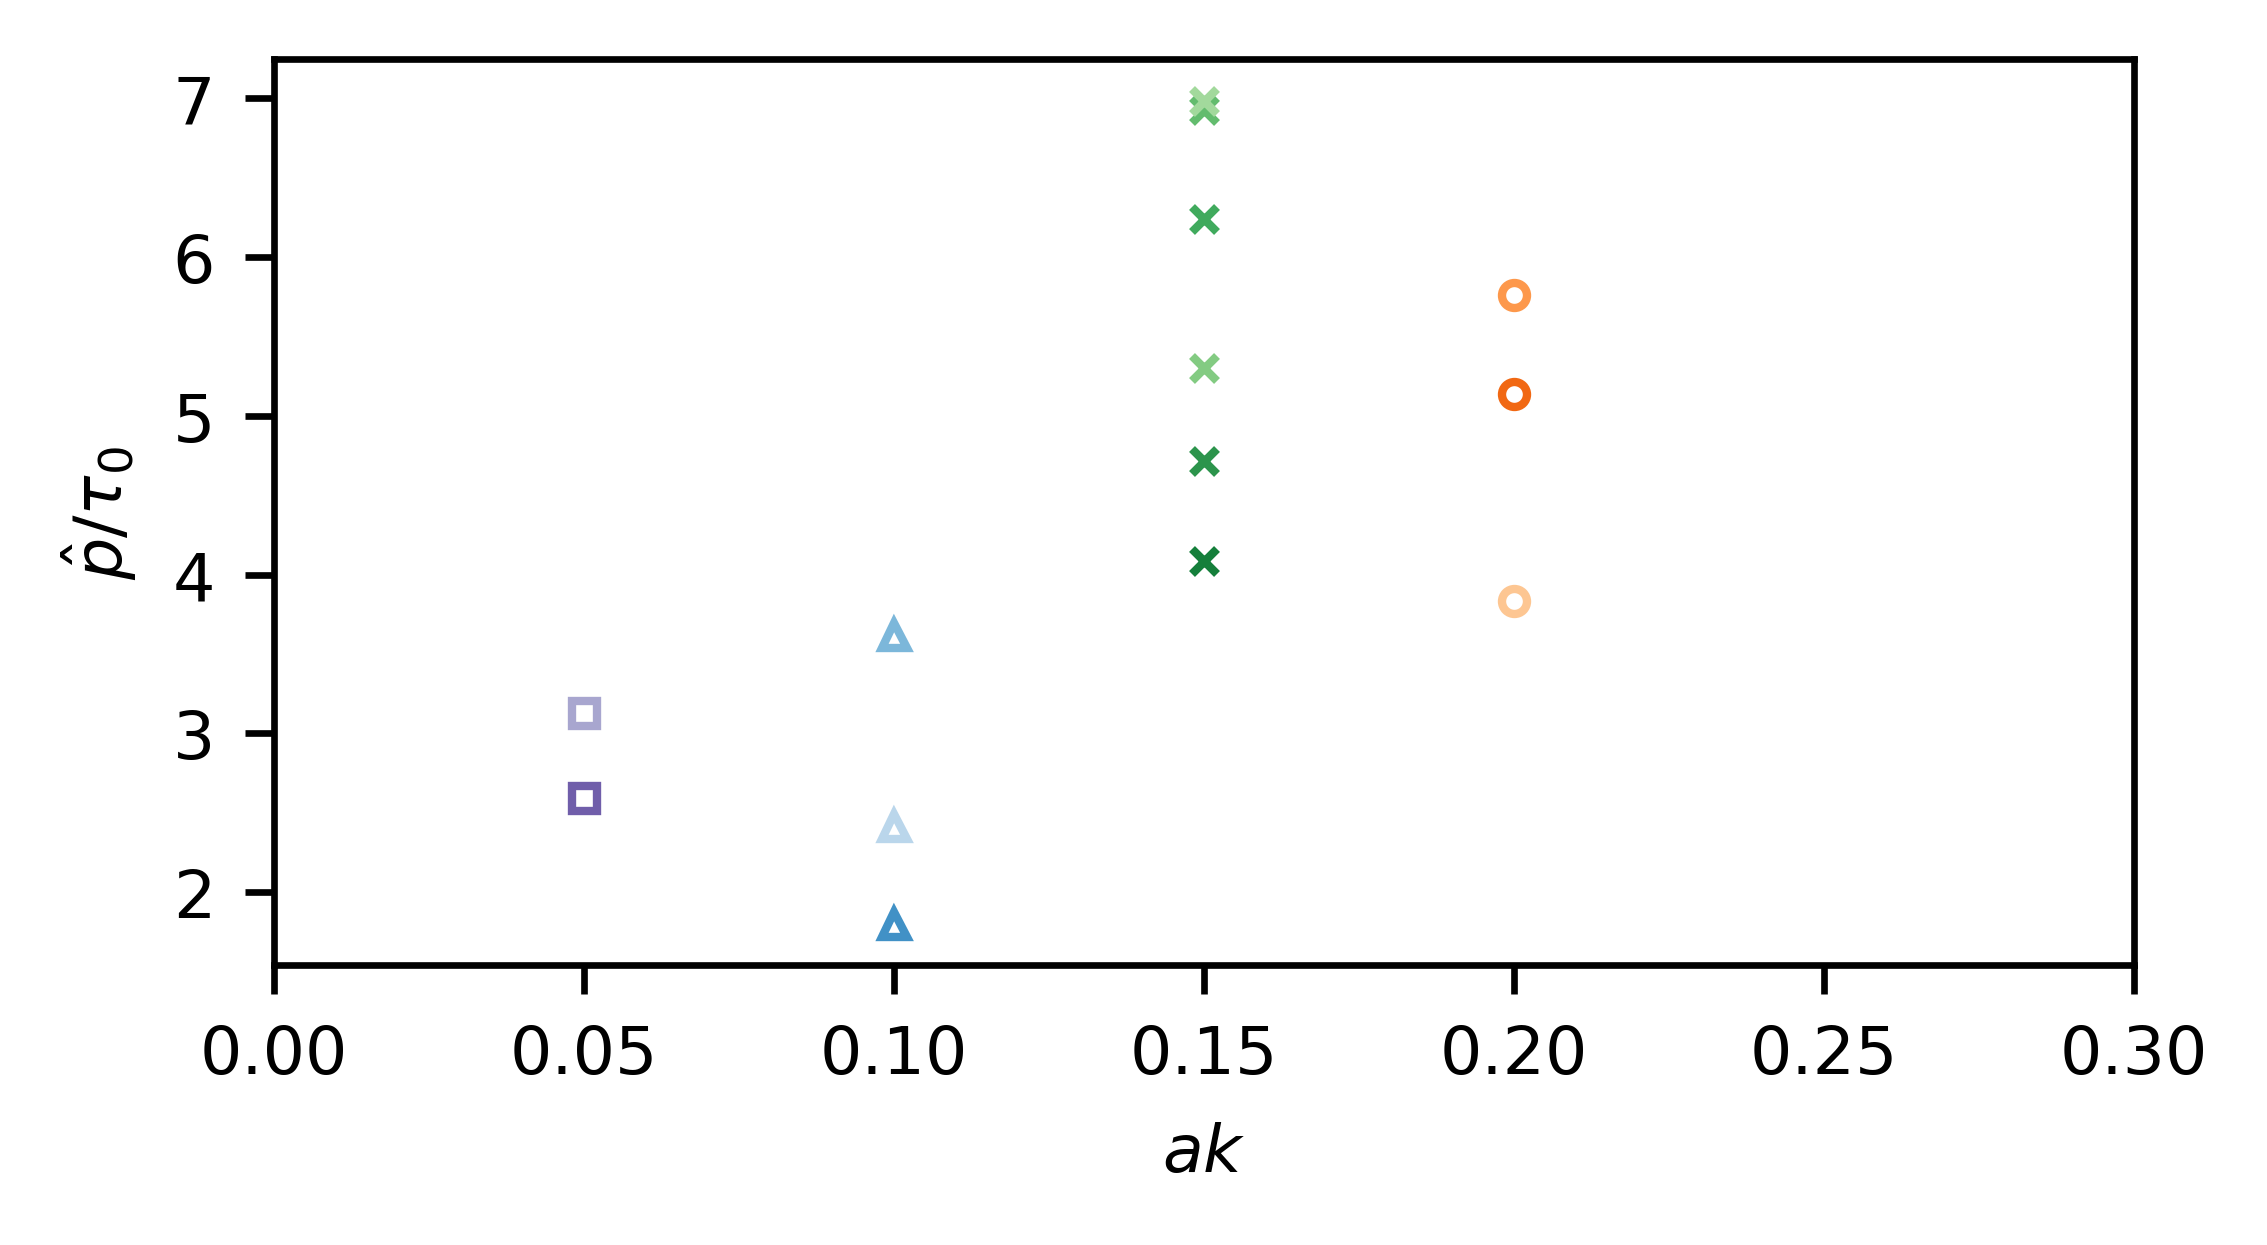

In [62]:
""" FIGURE: put all the amplitude together """
plt.figure(figsize = [4,2]); ax = plt.gca()
for case in (case1,case2,case3,ca se4,case5,case6,case7,case8,case9,case10,case11,case12,case13,case14):
    plt.plot(case.ak, np.average(case.pamp)/case.tau0, c=case.cc, marker=case.marker, mfc='none', lw=0, markersize=3, alpha = 1)
plt.ylabel(r'$\hat{p}/\tau_0$')
plt.xlabel(r'$ak$')
plt.xlim([0, 0.3])

5.069581178792416
5.366102859775391
4.376876836627535
4.23841378617709
6.015418519268986
4.91297989378104
5.218611411092145
5.608281343031678
6.450222508236078
6.797357064235527
5.945361004182115


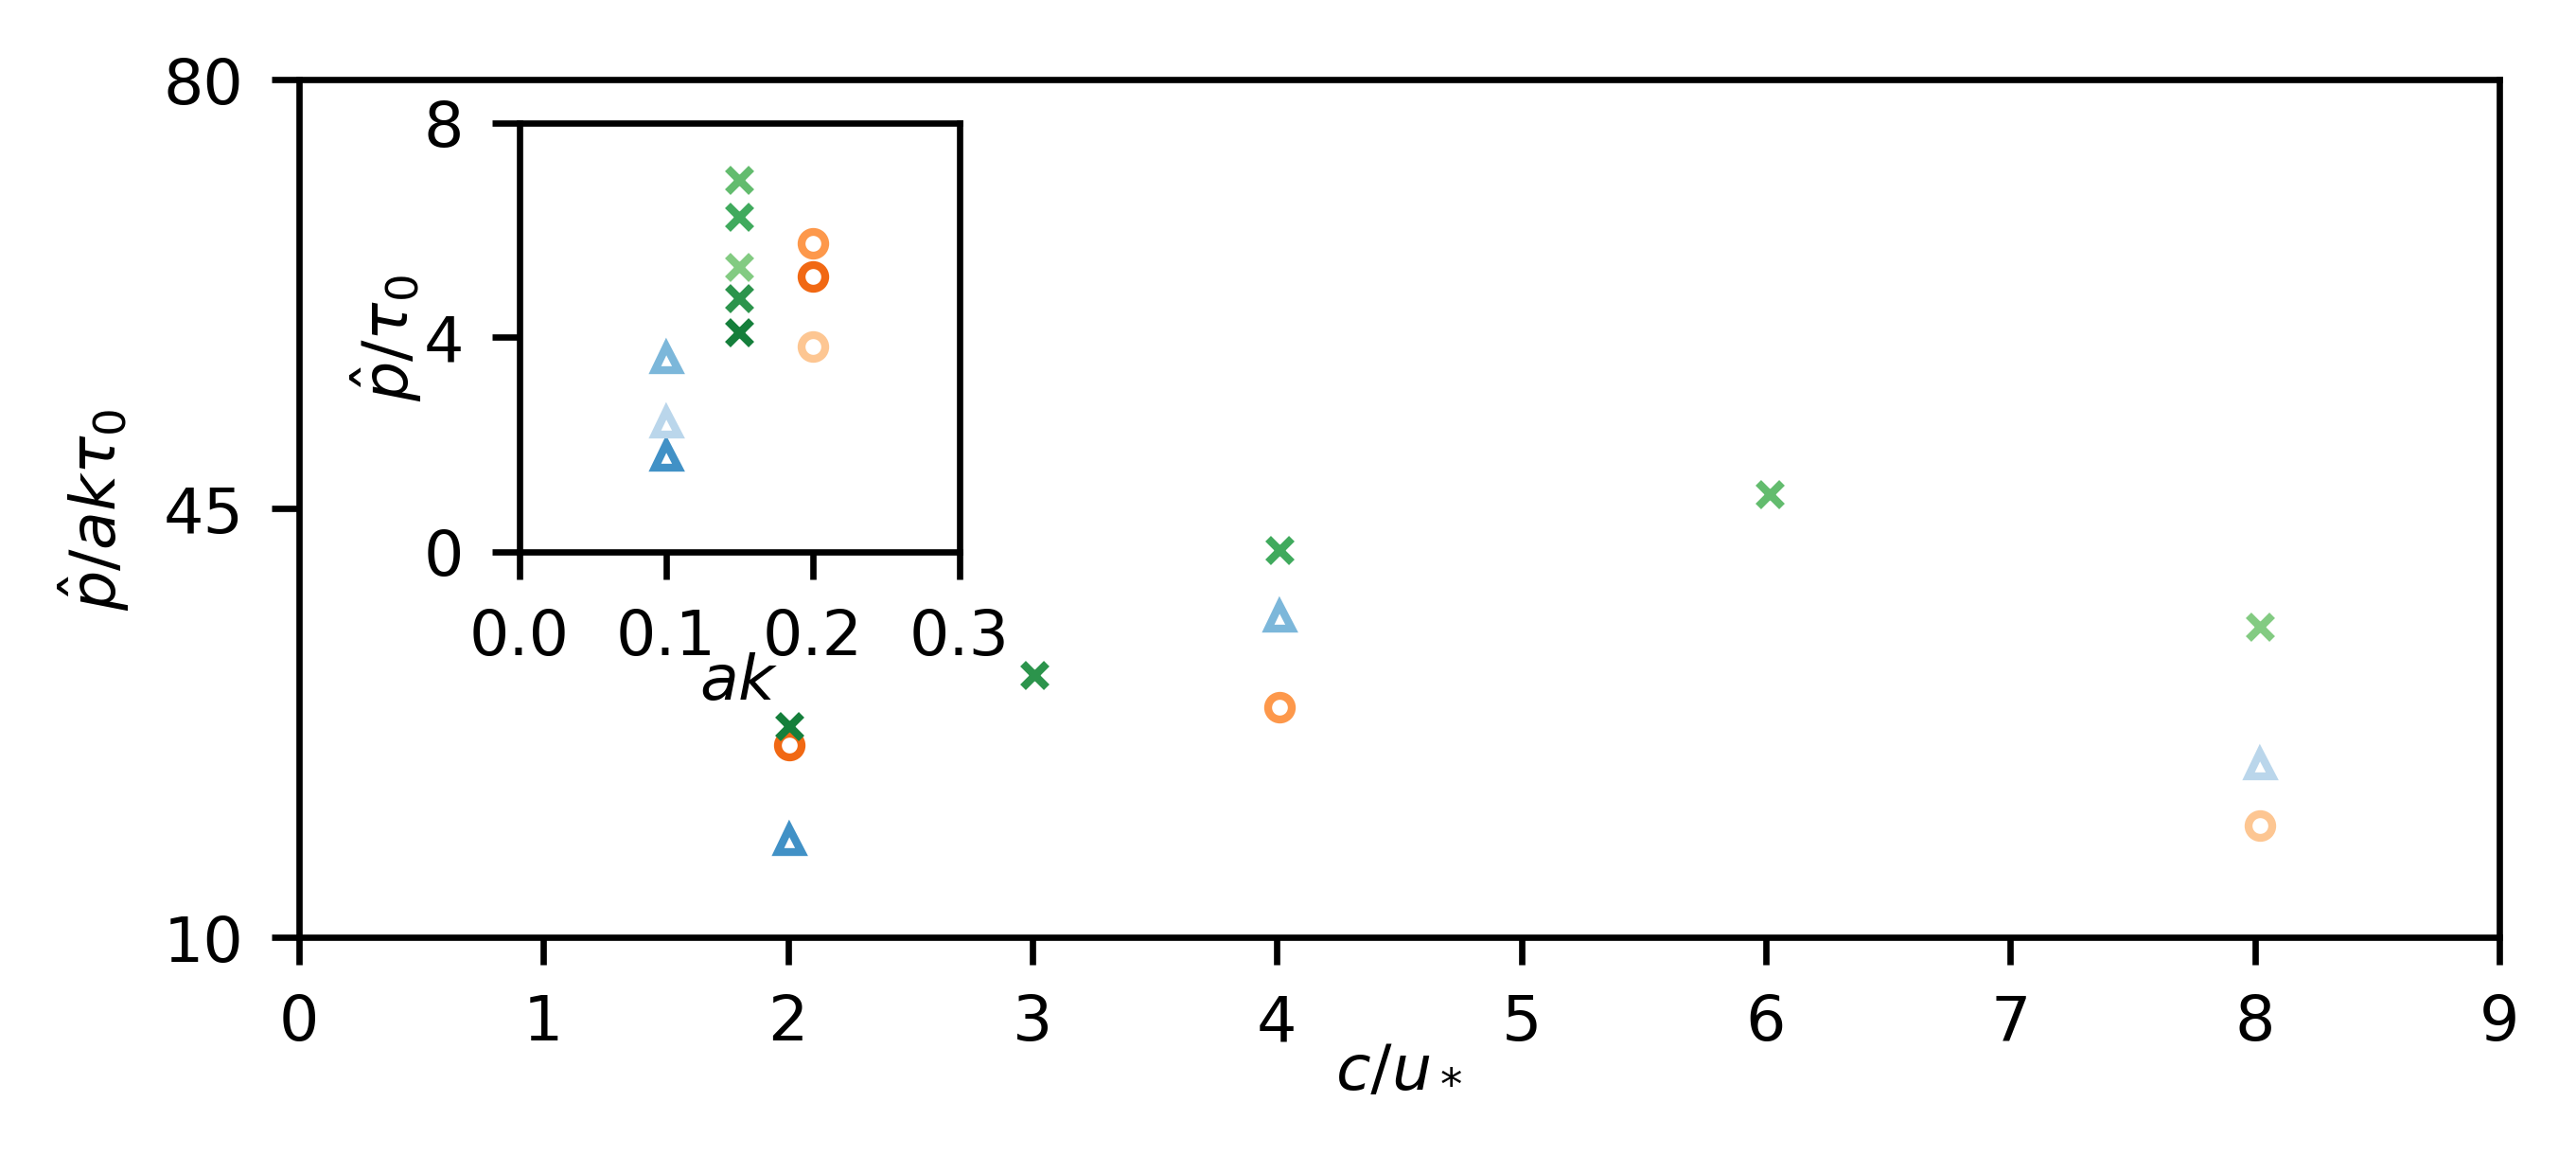

In [312]:
""" FIGURE: put all the amplitude together, divided by ak, to arrive at Um """
fig = plt.figure (figsize=[5,2]); ax1 = plt.gca()
# Manually set the position and relative size of the inset axes within ax1
ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(ax1, [0.1,0.45,0.2,0.5])
ax2.set_axes_locator(ip)

""" FIGURE: put all the amplitude together """
for case in (case1,case2,case3,case4,case5,case6,case7,case8,case9,case10,case11):
    ax2.plot(case.ak, np.average(case.pamp)/case.tau0, c=case.cc, marker=case.marker, mfc='none', lw=0, markersize=3, alpha = 1)
ax2.set_ylabel(r'$\hat{p}/\tau_0$', labelpad=0)
ax2.set_xlabel(r'$ak$', labelpad=-2)
ax2.set_xlim([0,0.3])
ax2.set_xticks(np.arange(0,0.4,0.1))
ax2.set_yticks(np.arange(0,10,4))

for case in (case1,case2,case3,case4,case5,case6,case7,case8,case9,case10,case11):
    case.Um = (np.average(case.pamp)/case.ak/case.tau0)**0.5
    print(case.Um)
    ax1.plot(case.wave.c/case.ustar, (np.average(case.pamp)/case.tau0/case.ak), c=case.cc, marker=case.marker, mfc='none', lw=0, markersize=3, alpha = 1)
    
ax1.set_ylabel(r'$\hat{p}/ ak \tau_0$')
ax1.set_xlabel(r'$c/u_*$', labelpad=-2)

ax1.set_ylim([10,80])
ax1.set_yticks(np.arange(10,90,35))
ax1.set_xlim([0,9])
fig.savefig('figures/phat.pdf', bbox_inches='tight', pad_inches=0.1)

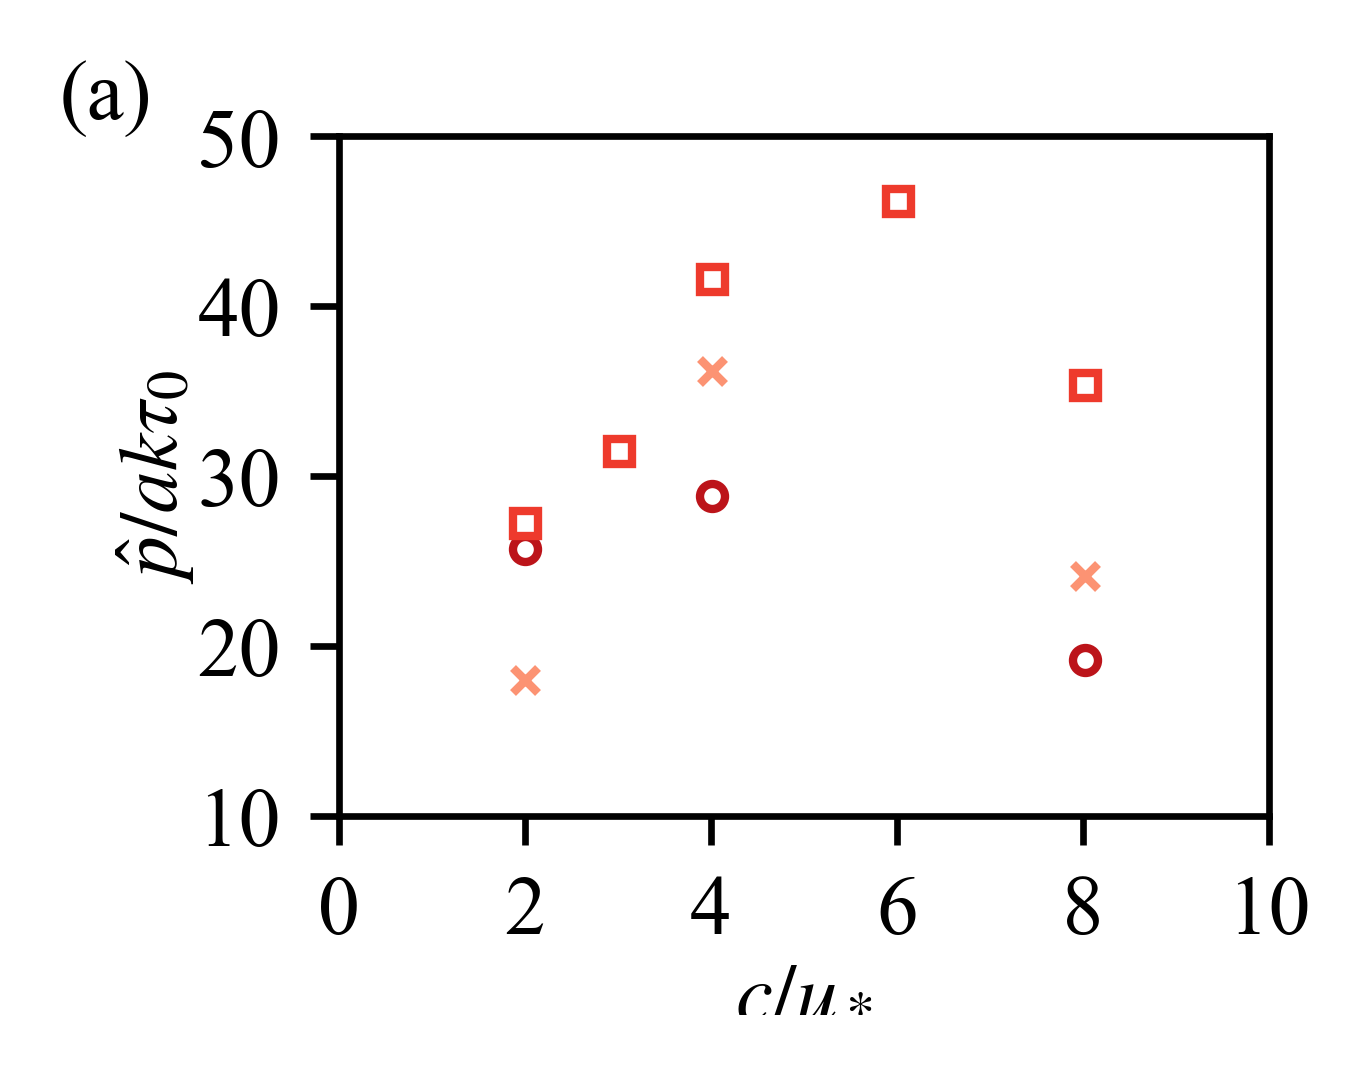

In [141]:
""" FIGURE_PRESENTATION: put all the amplitude together, divided by ak, to arrive at Um """
fig = plt.figure (figsize=[2,1.5]); ax1 = plt.gca()
# Manually set the position and relative size of the inset axes within ax1

# for case in (case1,case2,case3,case_pre1):
#     p1, = ax1.plot(case.wave.c/case.ustar, (np.average(case.pamp)/case.tau0/case.ak), marker='o', mfc='none',
#              label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(39), alpha = 1)
for case in (case1,case2,case3):
    p1, = ax1.plot(case.wave.c/case.ustar, (np.average(case.pamp)/case.tau0/case.ak), marker='o', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(39), alpha = 1)
for case in (case7,case9,case8,case10,case11):
    p3, = ax1.plot(case.wave.c/case.ustar, (np.average(case.pamp)/case.tau0/case.ak), marker='s', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(37), alpha = 1)
for case in (case4,case5,case6):
    p5, = ax1.plot(case.wave.c/case.ustar, (np.average(case.pamp)/case.tau0/case.ak), marker='x', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(34), alpha = 1)
# l = ax1.legend([(p1),(p3),(p5)], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
#                handler_map={tuple: HandlerTuple(ndivide=None)}, loc='lower center', frameon=False)

plt.ylim([10,50])
plt.xlim([0,10])
ax1.set_ylabel(r'$\hat{p}/ ak \tau_0$', labelpad=0)
ax1.set_xlabel(r'$c/u_*$', labelpad=0)
ax1.set_xticks(np.arange(0,12,2))
ax1.annotate('(a)', xy=(-0.3, 1), ha='left', va='bottom', xycoords='axes fraction')
# fig.savefig('figures/phat.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/phat.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/phat.eps', bbox_inches='tight', pad_inches=0.1)

In [272]:
def beta_us (Ui, Um, C, beta):
    return -2*((Um-C)/(Ui-C))**2*(C/Ui) - beta

from scipy.optimize import fsolve
for case in (case1,case2,case3,case4,case5,case6,case7,case8):
    case.beta = -np.sin(np.average(case.dphase)/128*2*np.pi)*case.Um**2
    case.Ui = fsolve(beta_us, 5, args=(case.Um, case.wave.c/case.ustar, case.beta))[0]
    print(case.Ui)

2.75378458951367
4.387793562204529
6.7457060823220765
2.6616884590349024
4.533715679918788
7.059908717868893
2.744678491662572
4.535805306638606


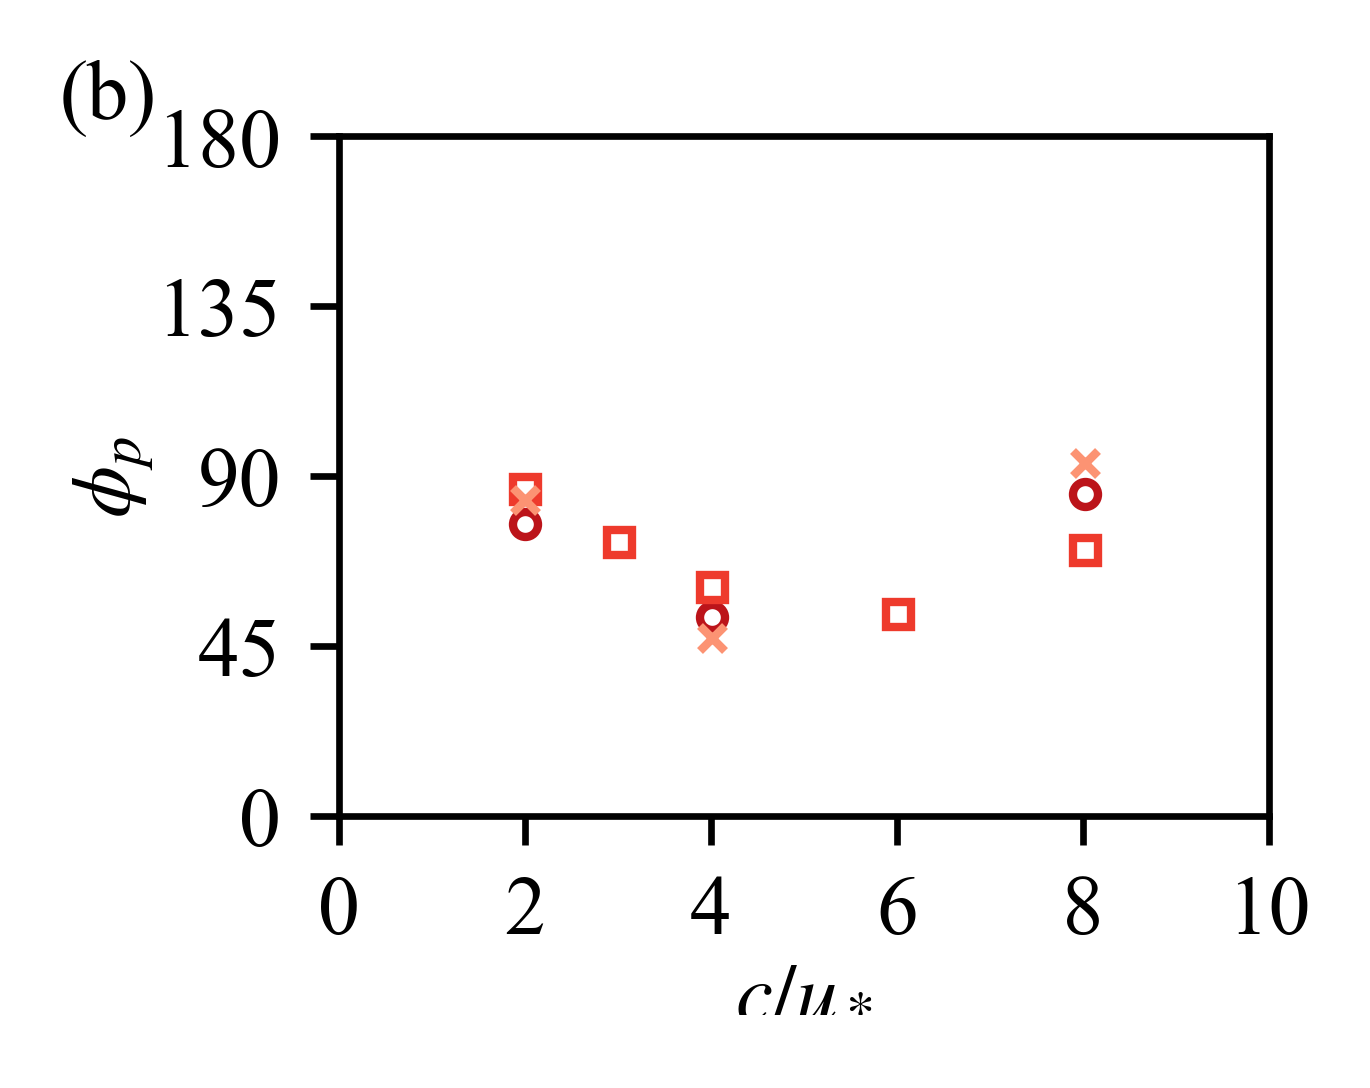

In [140]:
""" FIGURE: put all the phase shift together """
fig = plt.figure(figsize=[2,1.5]); ax = plt.gca()

plt.ylabel(r'$\phi_p$',labelpad=0)
plt.xlabel(r'$c/u_*$', labelpad=0)

for case in (case1,case2,case3):
    p1, = ax.plot(case.wave.c/case.ustar, np.average(case.dphase)/128*360, marker='o', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(39), alpha = 1)
for case in (case7,case9,case8,case10,case11):
    p3, = ax.plot(case.wave.c/case.ustar, np.average(case.dphase)/128*360, marker='s', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(37), alpha = 1)
for case in (case4,case5,case6):
    p5, = ax.plot(case.wave.c/case.ustar, np.average(case.dphase)/128*360, marker='x', mfc='none',
             label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(34), alpha = 1)
# l = ax.legend([(p1),(p3),(p5)], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
#                handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper center', frameon=False)

# """ Plot sin(dphase) instead """
# plt.figure(figsize = [4,2]); ax = plt.gca()
# for case in (case1,case2,case3,case4,case5,case6,case7,case8,case9,case10,case11):
#     plt.plot(case.wave.c/case.ustar, np.sin(np.average(case.dphase)/128*2*np.pi), c=case.cc, marker=case.marker, mfc='none', lw=0, markersize=3, alpha = 1)
# plt.ylim([0, 1])
# plt.ylabel(r'$sin(\phi_p)$')
# plt.xlabel(r'$c/u_*$')
plt.ylim([0,180])
ax.yaxis.set_ticks(np.arange(0, 181, 45))
plt.xlim([0,10])
ax.set_xticks(np.arange(0,12,2))
ax.annotate('(b)', xy=(-0.3, 1), ha='left', va='bottom', xycoords='axes fraction')
# fig.savefig('figures/dphase.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/dphase.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/dphase.eps', bbox_inches='tight', pad_inches=0.1)

### Compare with interfacial results? (To-do)

In [ ]:
case = case1
case.t = np.array(case.t)

for j in range(0, np.size(case.t)):
    case.interface[j].stress(case.tau0,case.nu_a)

# List comprehension
formdrag_all = [interface.formdrag for interface in case.interface]
p1d_all = [np.roll(np.average(interface.p/case.tau0, axis=0), -(interface.idx), axis=0) for interface in case.interface]
idx = [interface.idx for interface in case.interface]

case.isample = []
# Ensemble average of different time
p1d_t = []; tau1d_t = []; formdrag_t = []
for j in tqdm(range (2,30,2)):
    p1d_winaver = []; tau1d_winaver = []; formdrag_winaver = []
    case.isample.append(j)
    # Average over 5 time around the center t
    for i in range(j-2,j+3):
        interface = case.interface[i]
        p1d = np.average(interface.p/case.tau0, axis=0)
        p1d_shift = np.roll(p1d, -(interface.idx), axis=0)
        p1d_winaver.append(p1d_shift)
        tau1d = np.average(interface.tau_nux/case.tau0, axis=0)
        tau1d_shift = np.roll(tau1d, -(interface.idx), axis=0)
        tau1d_winaver.append(tau1d_shift)
        formdrag_winaver.append(interface.formdrag)
        
    p1d_t.append(np.average(p1d_winaver, axis=0))
    tau1d_t.append(np.average(tau1d_winaver, axis=0))
    formdrag_t.append(np.average(formdrag_winaver, axis=0))

case.isample = np.array(case.isample)

### Fitting the Belcher formula